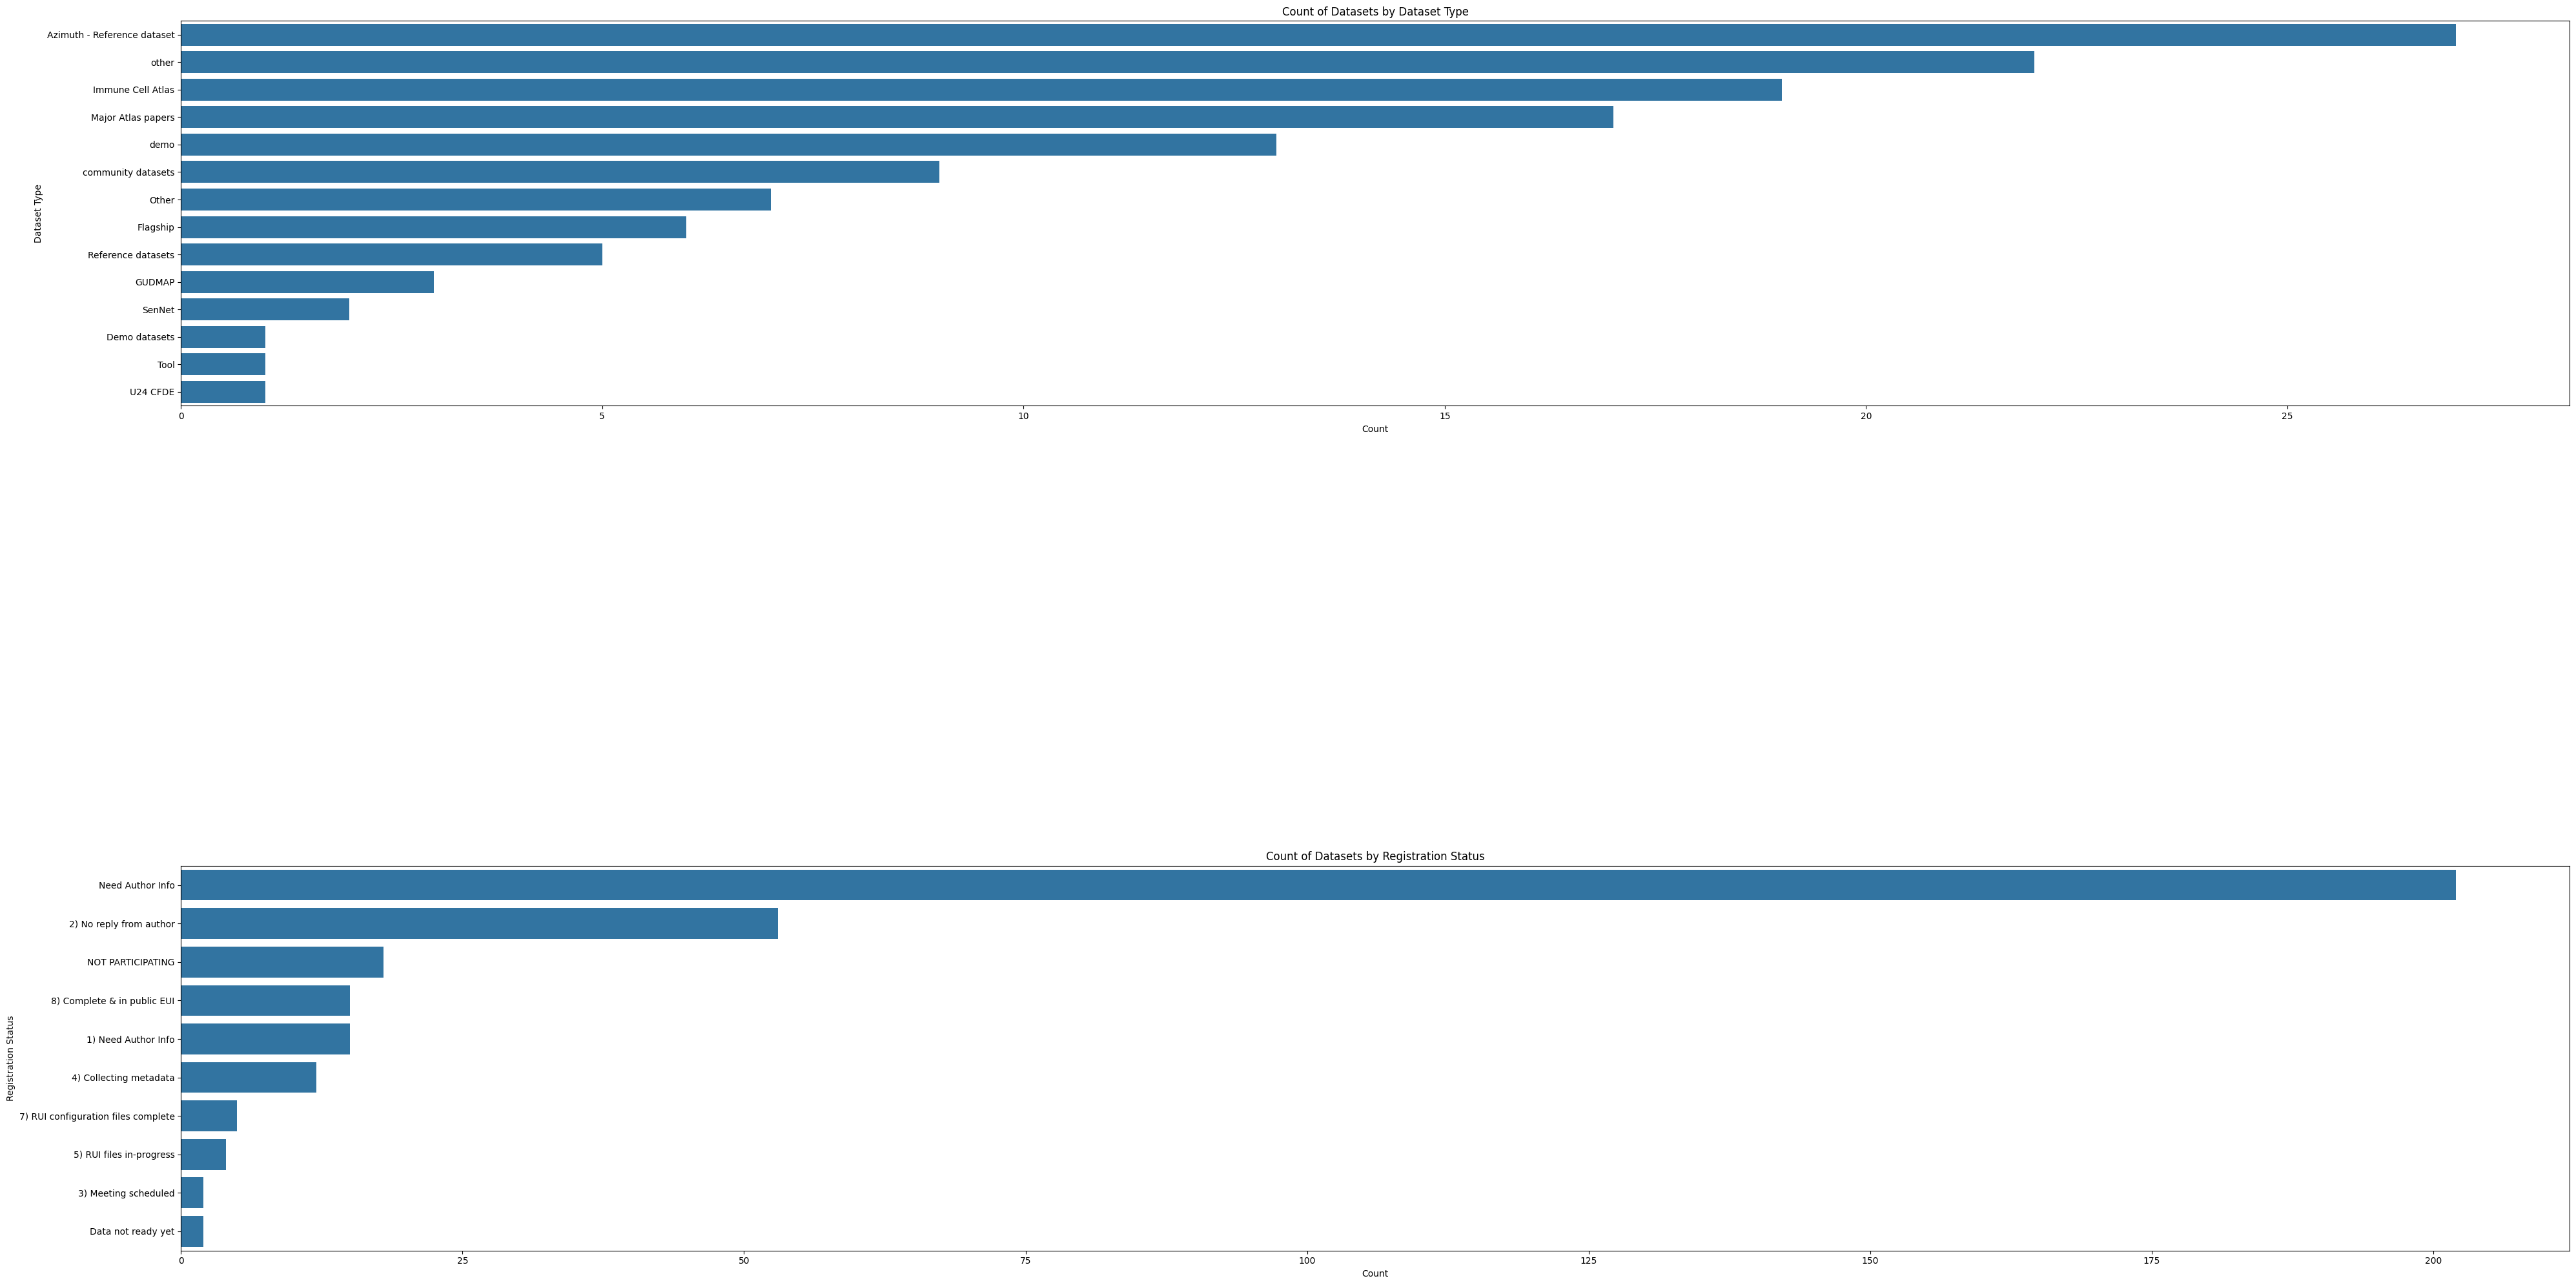

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset from the Excel file
file_path = 'RUI Registration Dashboard.xlsx'  # Update this to your actual file path
sheet_name = 'All studies for RUI-registratio'  # Update this to your actual sheet name
data_with_correct_headers = pd.read_excel(file_path, sheet_name=sheet_name, header=3)  # Assuming header is in the 4th row

# Adjusting the figure size for better readability
plt.figure(figsize=(40, 20))

# Visualization 1: Count of Datasets by Dataset Type
plt.subplot(3, 1, 1)  # 3 rows, 1 column, 1st subplot
sns.countplot(y='Dataset Type', data=data_with_correct_headers, order=data_with_correct_headers['Dataset Type'].value_counts().index)
plt.title('Count of Datasets by Dataset Type')
plt.xlabel('Count')
plt.ylabel('Dataset Type')

# Visualization 2: Count of Datasets by Organ
# plt.subplot(3, 1, 2)  # 3 rows, 1 column, 2nd subplot
# sns.countplot(y='Organ', data=data_with_correct_headers, order=data_with_correct_headers['Organ'].value_counts().index)
# plt.title('Count of Datasets by Organ')
# plt.xlabel('Count')
# plt.ylabel('Organ')

# Visualization 3: Count of Datasets by Registration Status
plt.subplot(3, 1, 3)  # 3 rows, 1 column, 3rd subplot
sns.countplot(y='Registration Status', data=data_with_correct_headers, order=data_with_correct_headers['Registration Status'].value_counts().index)
plt.title('Count of Datasets by Registration Status')
plt.xlabel('Count')
plt.ylabel('Registration Status')

plt.tight_layout()  # Adjusts the subplots to fit into the figure area.
plt.show()


In [ ]:
pip install squarify


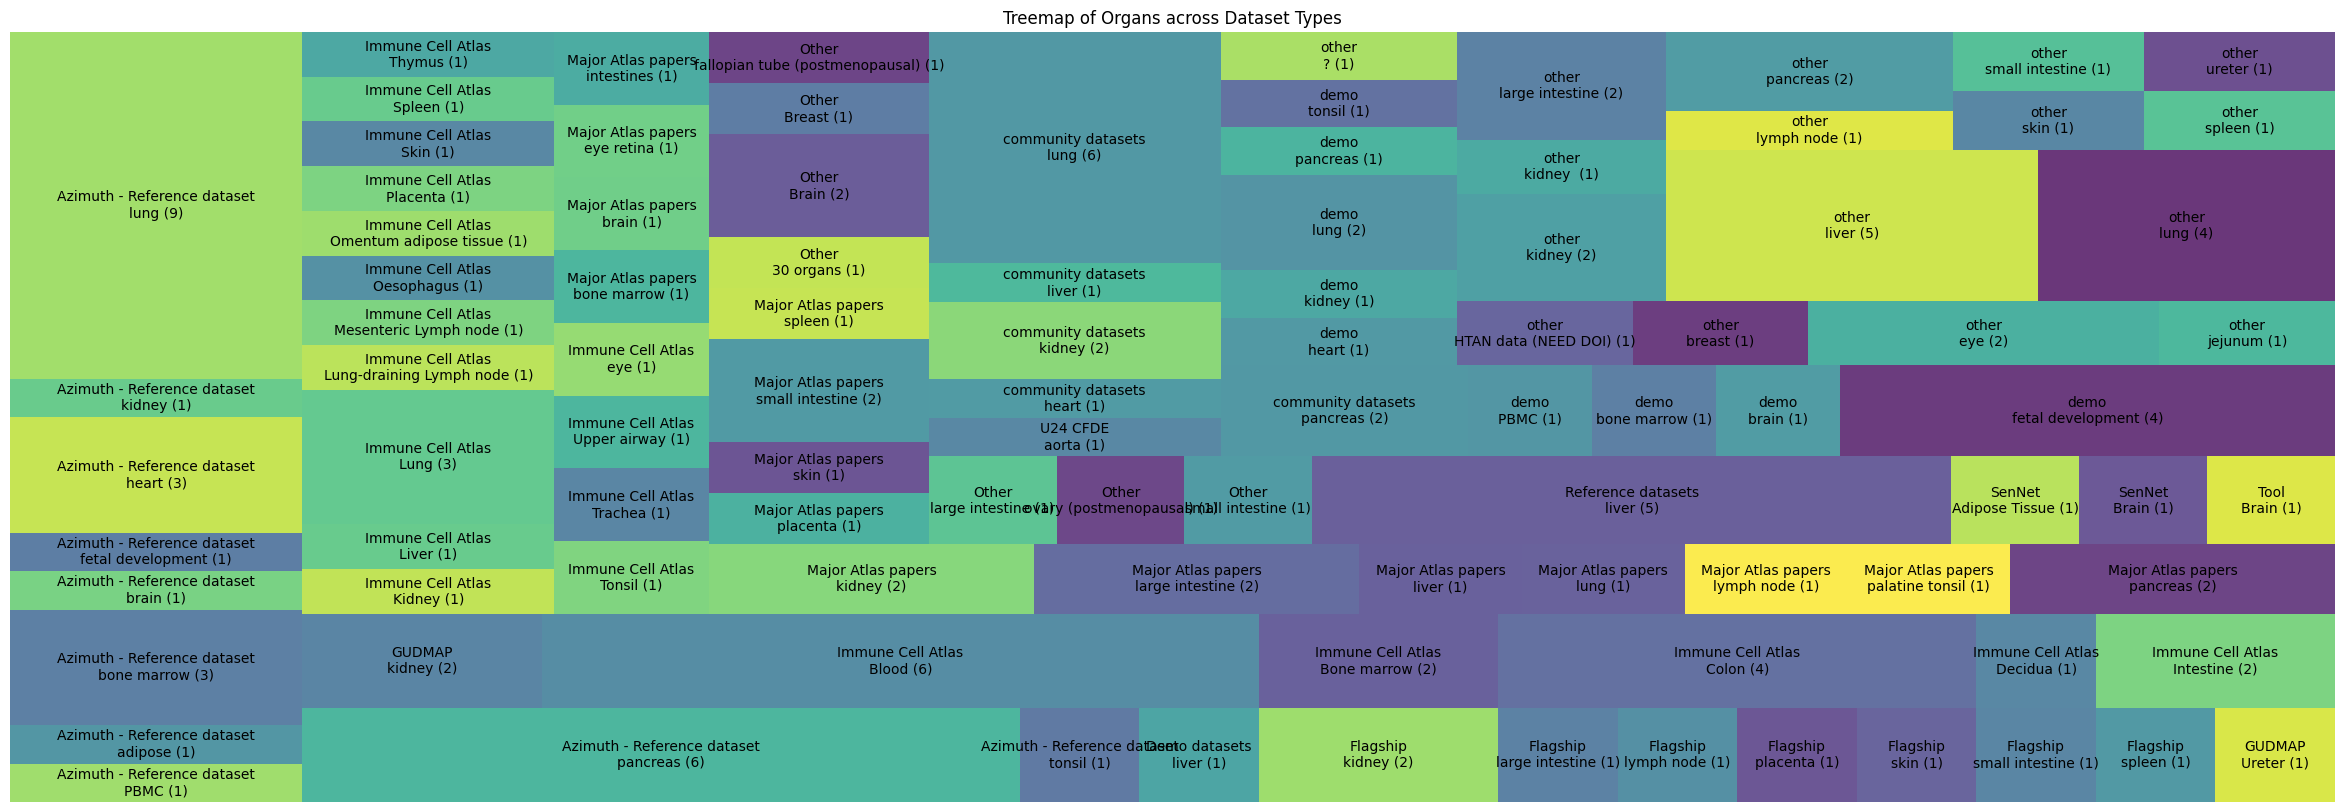

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import squarify

# Assuming 'data_with_correct_headers' is your DataFrame loaded from the Excel file
# You need to make sure this DataFrame is loaded in your session

# Preprocessing to separate combined organ names into individual rows
data_expanded_organs = data_with_correct_headers.assign(Organ=data_with_correct_headers['Organ'].str.split(', ')).explode('Organ')

# Calculating the count of each organ within each dataset type
organ_counts = data_expanded_organs.groupby(['Dataset Type', 'Organ']).size().reset_index(name='counts')

# Generating labels for each rectangle in the treemap, including the dataset type, organ, and count
labels = organ_counts.apply(lambda x: f"{x['Dataset Type']}\n{x['Organ']} ({x['counts']})", axis=1)

# Creating the treemap
plt.figure(figsize=(30, 10))
squarify.plot(sizes=organ_counts['counts'], label=labels, alpha=0.8)
plt.axis('off')  # Removes the axes for a cleaner look
plt.title('Treemap of Organs across Dataset Types')
plt.show()



In [ ]:
pip install plotly


In [ ]:
import plotly.graph_objects as go

# Assuming 'data_expanded_organs' contains your preprocessed DataFrame
# Let's create a sunburst chart to visualize the hierarchy

# Preparing data for the sunburst chart
ids = data_expanded_organs['Dataset Type'] + ' - ' + data_expanded_organs['Organ']
parents = data_expanded_organs['Dataset Type']

# Creating the sunburst chart
fig = go.Figure(go.Sunburst(
    ids=ids,
    labels=data_expanded_organs['Organ'],
    parents=parents,
    values=data_expanded_organs.groupby(['Dataset Type', 'Organ']).size(),  # Counts of each organ within dataset types
    branchvalues="total",  # Determines how the values are summed. "total" means the value of each branch is the total of its children
))

fig.update_layout(margin=dict(t=0, l=0, r=0, b=0))
fig.show()


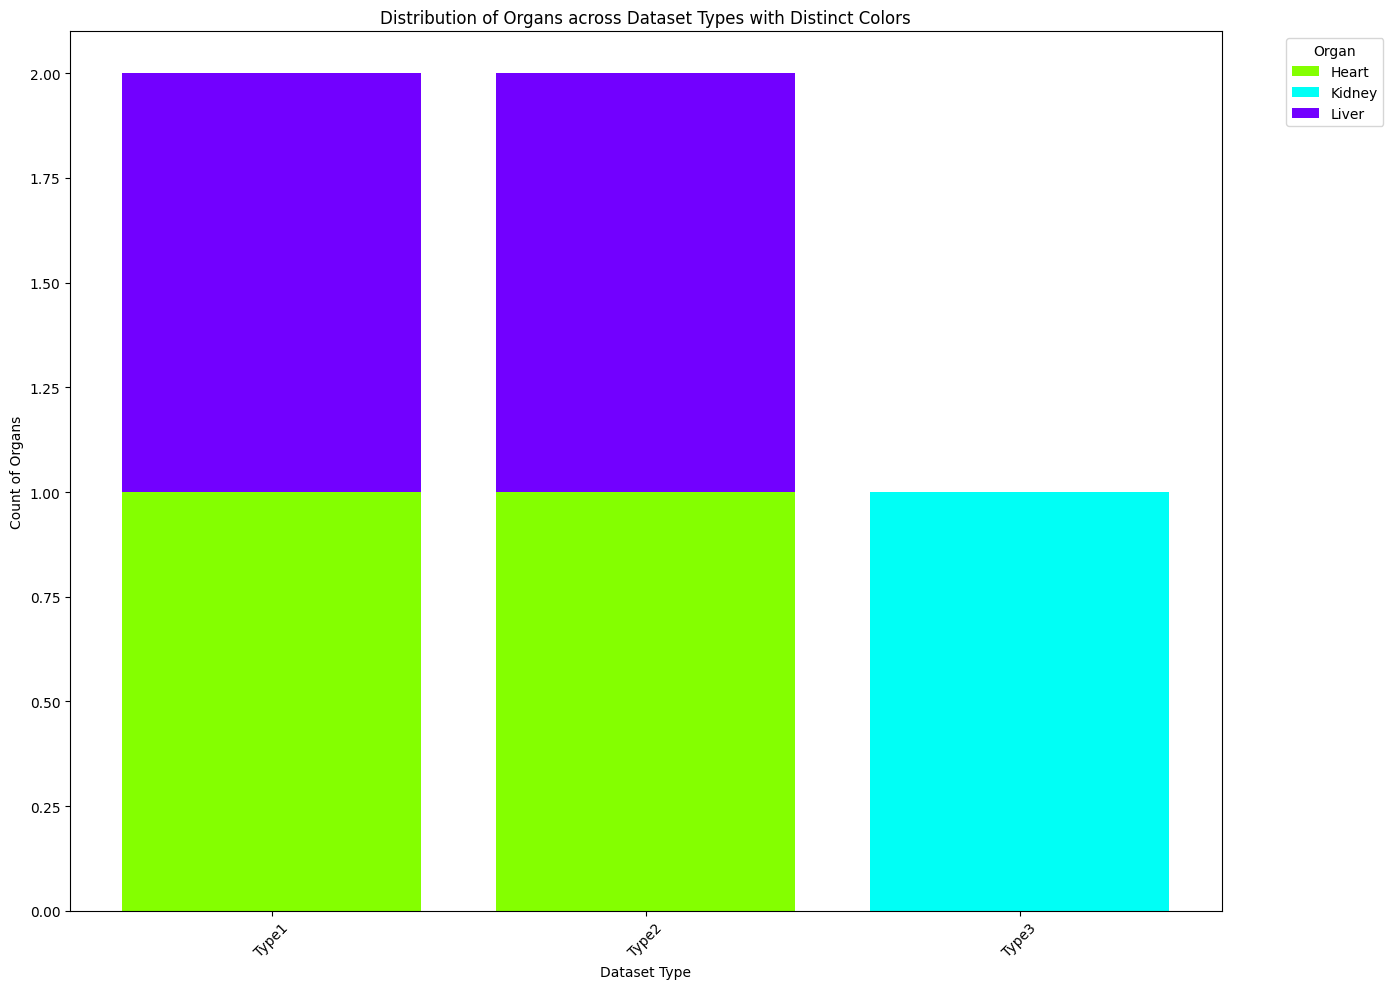

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming 'data_expanded_organs' is your DataFrame after separating combined organ names into individual rows
# Calculate the count of each organ within each dataset type
organ_counts = data_expanded_organs.groupby(['Dataset Type', 'Organ']).size().unstack(fill_value=0)

# Generate a color palette with a distinct color for each organ
palette = sns.color_palette("hsv", len(organ_counts.columns))  # You can choose any palette

# Plotting
plt.figure(figsize=(14, 10))
bottom = np.zeros(len(organ_counts))

for i, organ in enumerate(organ_counts.columns):
    plt.bar(organ_counts.index, organ_counts[organ], bottom=bottom, color=palette[i], label=organ)
    bottom += organ_counts[organ]

plt.title('Distribution of Organs across Dataset Types with Distinct Colors')
plt.ylabel('Count of Organs')
plt.xlabel('Dataset Type')
plt.xticks(rotation=45)
plt.legend(title='Organ', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


<Figure size 3000x1000 with 0 Axes>

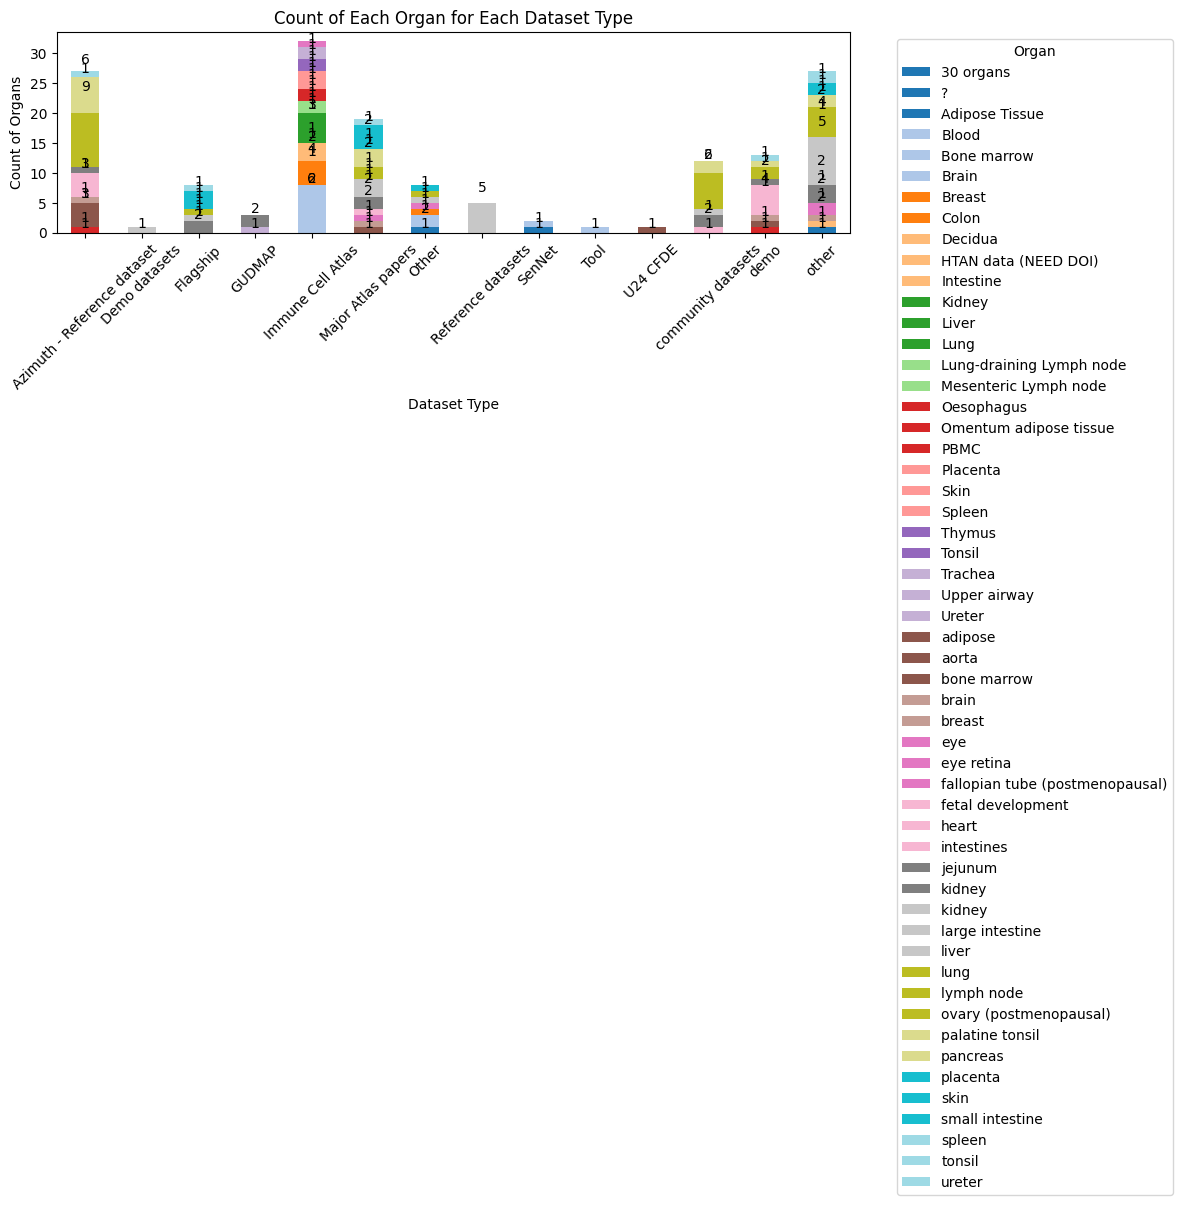

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset from the Excel file
file_path = 'RUI Registration Dashboard.xlsx'  # Update this to the correct path
sheet_name = 'All studies for RUI-registratio'  # Ensure this is the correct sheet name
data_with_correct_headers = pd.read_excel(file_path, sheet_name=sheet_name, header=3)

# Preprocess the "Organ" column to ensure individual organs are treated separately
data_with_correct_headers['Organ'] = data_with_correct_headers['Organ'].str.split(', ')
data_expanded_organs = data_with_correct_headers.explode('Organ')

# Calculate the count of each organ within each dataset type
organ_counts = data_expanded_organs.groupby(['Dataset Type', 'Organ']).size().reset_index(name='Count')

# Pivot the data for the stacked bar chart
pivot_data = organ_counts.pivot(index='Dataset Type', columns='Organ', values='Count').fillna(0)

# Plot
plt.figure(figsize=(30, 10))
pivot_data.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='tab20')
plt.title('Count of Each Organ for Each Dataset Type')
plt.xlabel('Dataset Type')
plt.ylabel('Count of Organs')
plt.xticks(rotation=45)

# Annotate the count on each bar
for n, x in enumerate([*pivot_data.index.values]):
    for organ in pivot_data.columns:
        value = pivot_data.loc[x][organ]
        if value > 0:
            plt.text(n, pivot_data.loc[x][:organ].sum() + (value/2), int(value), ha='center', va='center')

plt.legend(title='Organ', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset from the Excel file, considering the header starts from the 4th row
file_path = 'RUI Registration Dashboard.xlsx'  # Update this to your actual file path
sheet_name = 'All studies for RUI-registratio'  # Ensure this matches your actual sheet name
data_with_correct_headers = pd.read_excel(file_path, sheet_name=sheet_name, header=3)

# Preprocess the "Organ" column
data_expanded_organs = data_with_correct_headers.assign(Organ=data_with_correct_headers['Organ'].str.split(', ')).explode('Organ')


# Calculate counts for each organ within each dataset type
organ_counts = data_expanded_organs.groupby(['Dataset Type', 'Organ']).size().reset_index(name='counts')

# Create a color palette that has a unique color for each organ
unique_organs = organ_counts['Organ'].unique()
palette = sns.color_palette("husl", len(unique_organs))
organ_color_map = dict(zip(unique_organs, palette))

# Plotting
plt.figure(figsize=(20, 10))  # Adjusted for better readability and space for annotations

for _, row in organ_counts.iterrows():
    dataset_type = row['Dataset Type']
    organ = row['Organ']
    count = row['counts']
    color = organ_color_map[organ]
    # Assuming each dataset type has a position on the x-axis
    position = list(unique_organs).index(organ)
    plt.bar(dataset_type, count, color=color, label=organ if organ not shown before)

# Improve legibility of annotations
for _, row in organ_counts.iterrows():
    plt.text(row['Dataset Type'], row['counts'], f"{row['Organ']}-{row['counts']}", rotation=45, ha="right")

plt.xticks(rotation=45)
plt.legend(title='Organ')
plt.title('Count of Datasets by Dataset Type with Individual Organs')
plt.xlabel('Dataset Type')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


SyntaxError: expected 'else' after 'if' expression (<ipython-input-15-2122c84e63d0>, line 32)

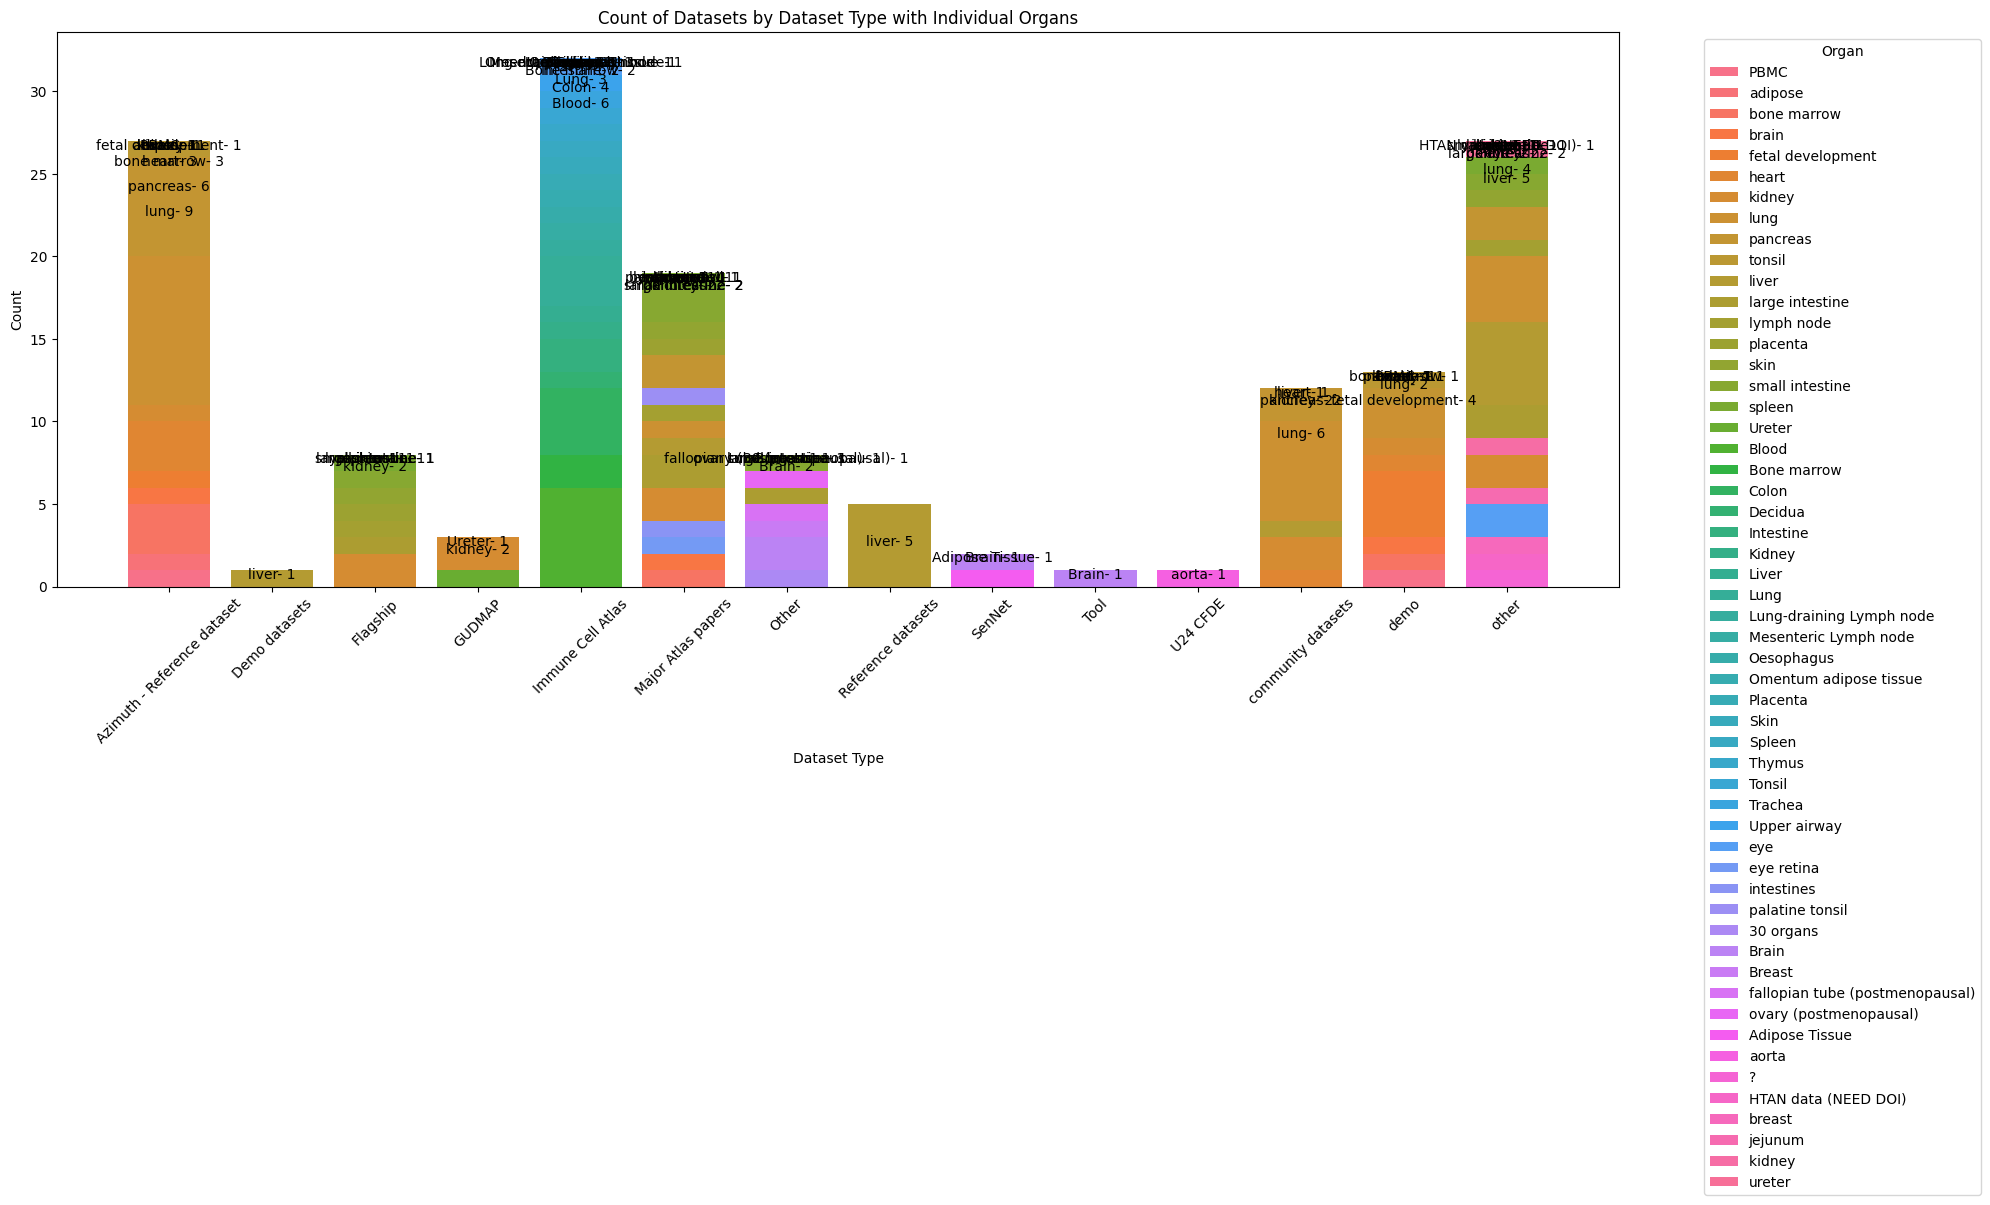

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming data_expanded_organs is your DataFrame after exploding the Organ column

# Simulating organ_counts calculation for demonstration
organ_counts = data_expanded_organs.groupby(['Dataset Type', 'Organ']).size().reset_index(name='counts')

# Create a unique color for each organ
unique_organs = organ_counts['Organ'].unique()
palette = sns.color_palette("husl", len(unique_organs))
organ_color_map = {organ: color for organ, color in zip(unique_organs, palette)}

# Initialize a set to track which organs have been added to the legend
added_to_legend = set()

# Adjusting figure size for clarity
plt.figure(figsize=(20, 10))

# Track the bottom position for each dataset type
bottoms = {dataset_type: 0 for dataset_type in organ_counts['Dataset Type'].unique()}

for _, row in organ_counts.iterrows():
    dataset_type = row['Dataset Type']
    organ = row['Organ']
    count = row['counts']
    color = organ_color_map[organ]
    label = organ if organ not in added_to_legend else ""
    plt.bar(dataset_type, count, bottom=bottoms[dataset_type], color=color, label=label)
    bottoms[dataset_type] += count
    added_to_legend.add(organ)

# Annotating each bar with the organ name and count
for _, row in organ_counts.iterrows():
    plt.text(row['Dataset Type'], bottoms[row['Dataset Type']] - (row['counts']/2), f"{row['Organ']}- {row['counts']}", ha="center")

plt.xticks(rotation=45)
plt.legend(title='Organ', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Count of Datasets by Dataset Type with Individual Organs')
plt.xlabel('Dataset Type')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


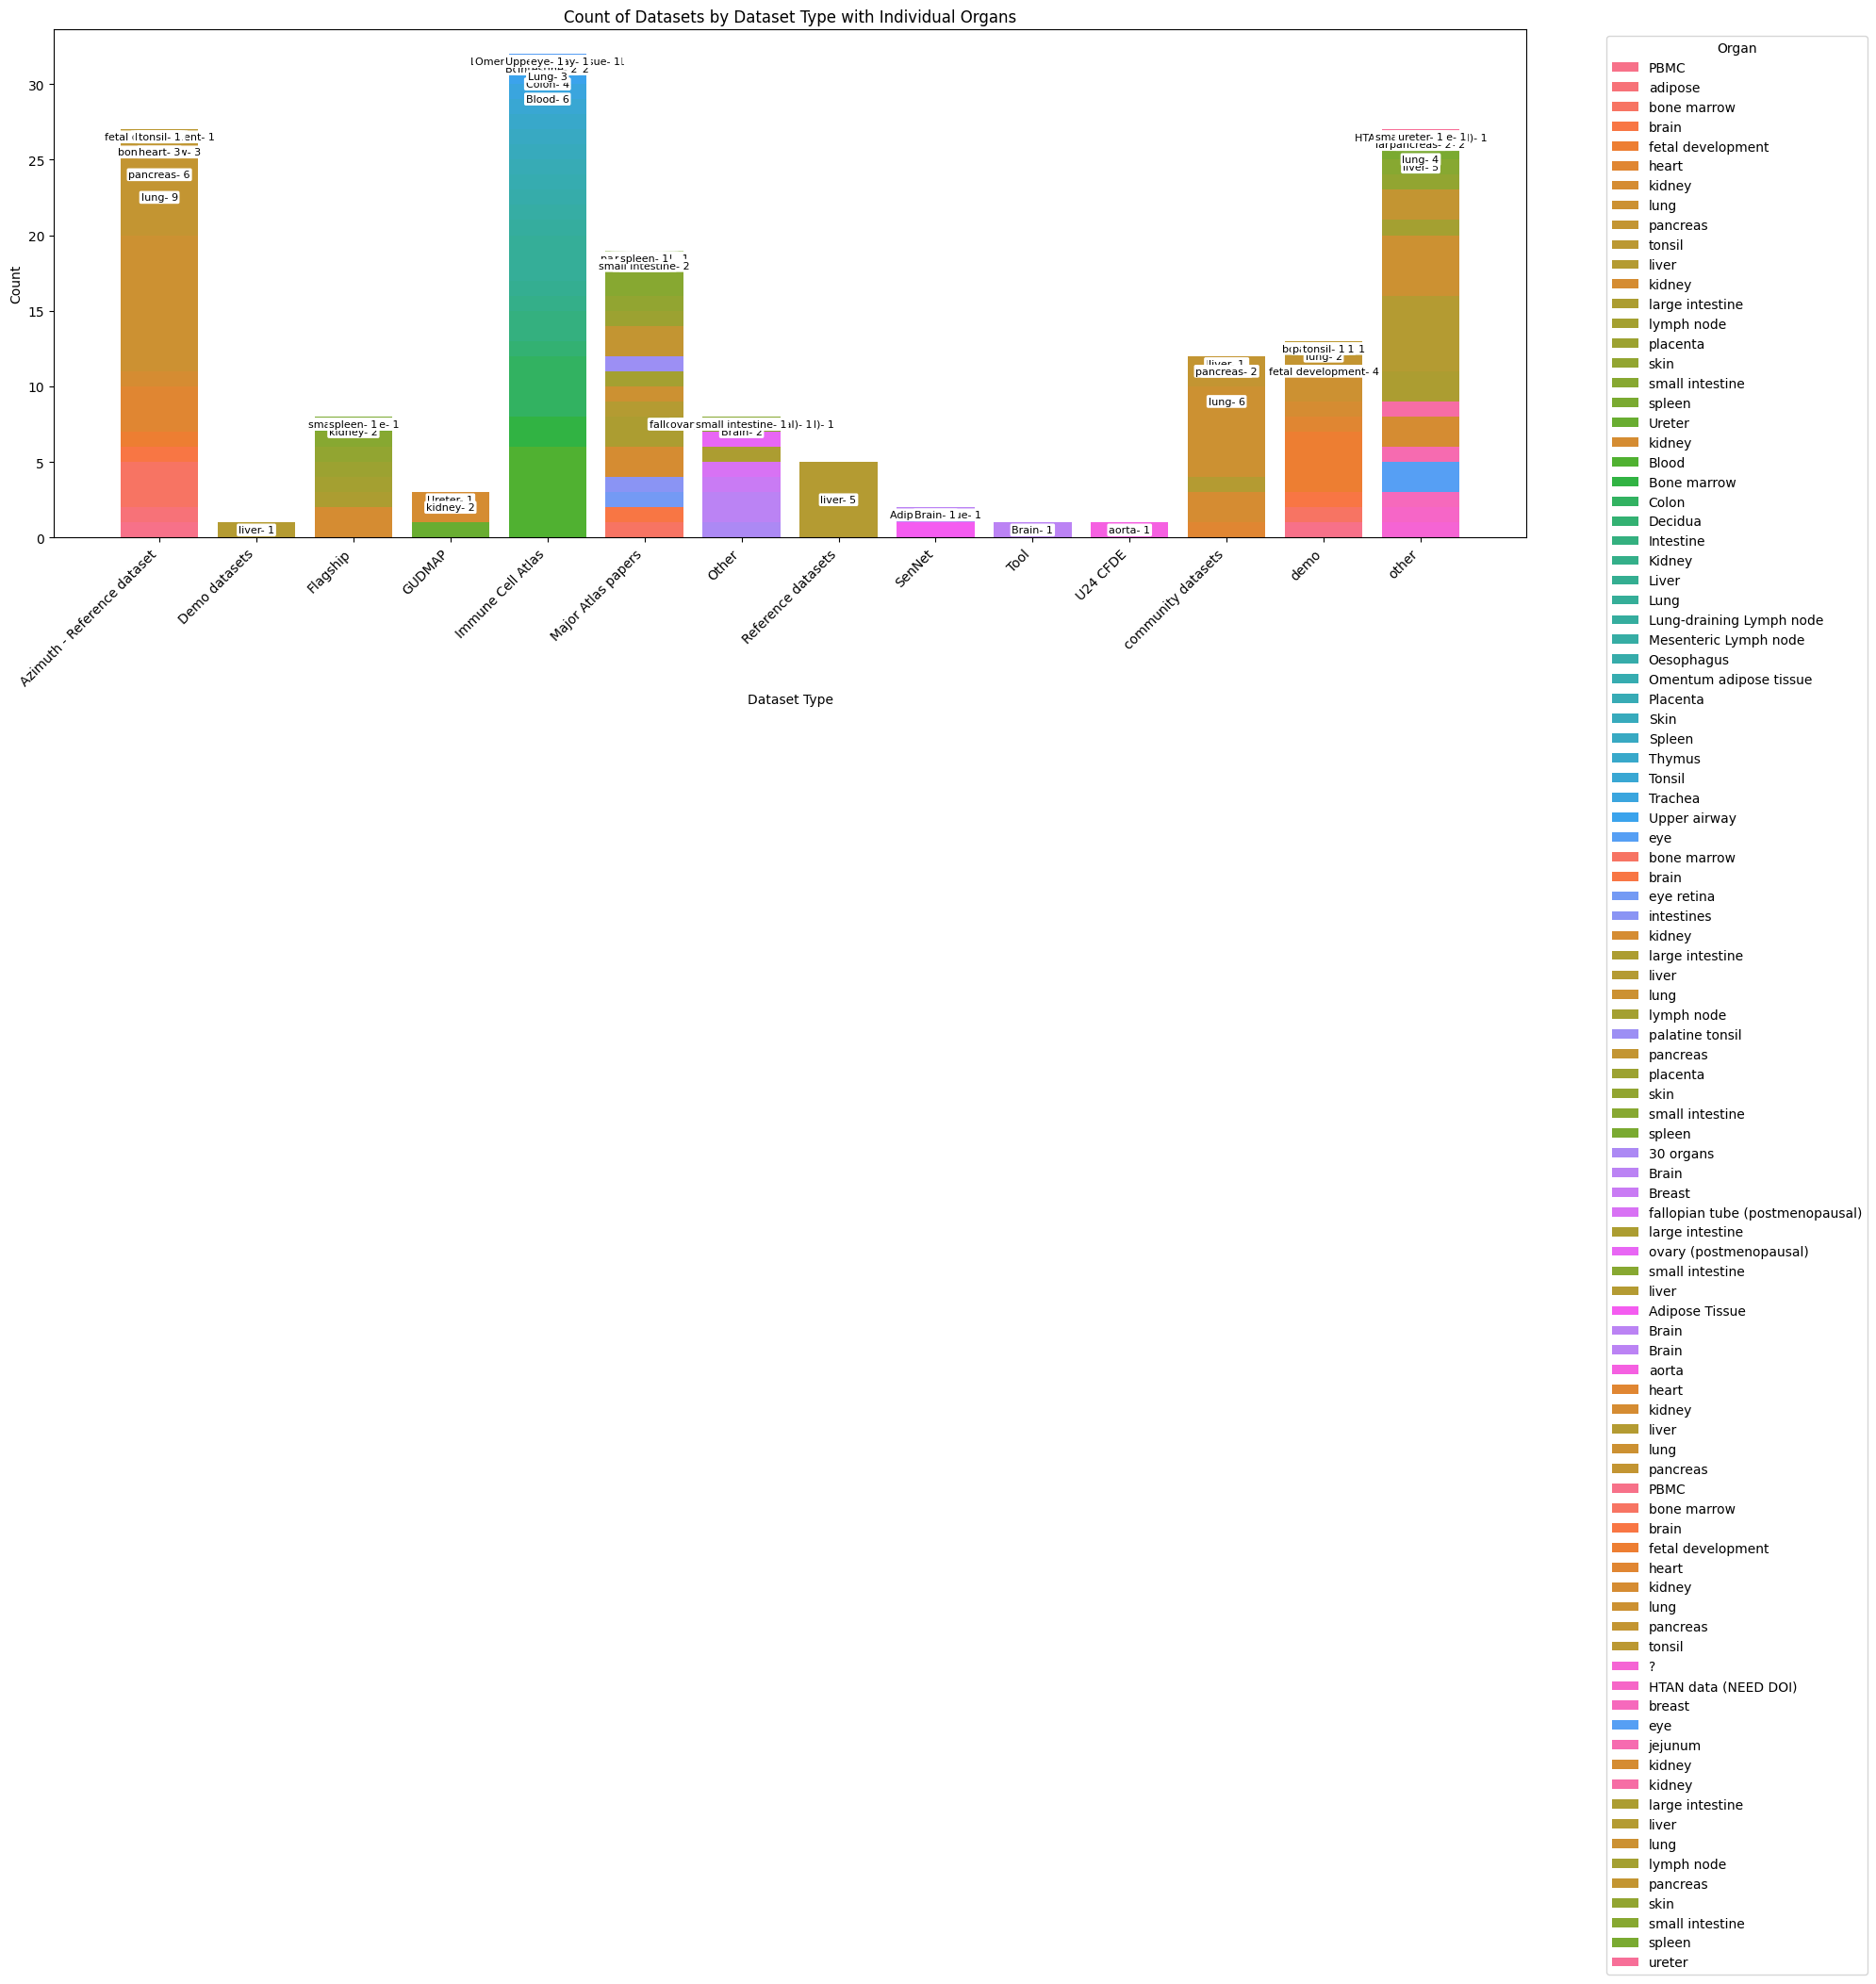

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset from the Excel file, considering the header starts from the 4th row
file_path = 'RUI Registration Dashboard.xlsx'  # Update this to your actual file path
sheet_name = 'All studies for RUI-registratio'  # Ensure this matches your actual sheet name
data_with_correct_headers = pd.read_excel(file_path, sheet_name=sheet_name, header=3)

# Preprocess the "Organ" column
data_expanded_organs = data_with_correct_headers.assign(Organ=data_with_correct_headers['Organ'].str.split(', ')).explode('Organ')

# Calculate counts for each organ within each dataset type
organ_counts = data_expanded_organs.groupby(['Dataset Type', 'Organ']).size().reset_index(name='counts')

# Plotting
plt.figure(figsize=(20, 15))  # Increased figure size for clarity

# Create a color palette that has a unique color for each organ
unique_organs = organ_counts['Organ'].unique()
palette = sns.color_palette("husl", len(unique_organs))
organ_color_map = {organ: color for organ, color in zip(unique_organs, palette)}

# Track the bottom position for each dataset type to stack the bars
bottoms = {dataset_type: 0 for dataset_type in organ_counts['Dataset Type'].unique()}

for _, row in organ_counts.iterrows():
    dataset_type = row['Dataset Type']
    organ = row['Organ']
    count = row['counts']
    color = organ_color_map[organ]
    plt.bar(dataset_type, count, bottom=bottoms[dataset_type], color=color, label=organ if organ not in bottoms else "")
    bottoms[dataset_type] += count  # Update the bottom position for the next bar

# Annotating each bar with the organ name and count
for _, row in organ_counts.iterrows():
    x = row['Dataset Type']
    y = bottoms[row['Dataset Type']] - (row['counts'] / 2)
    text = f"{row['Organ']}- {row['counts']}"
    plt.text(x, y, text, ha='center', va='center', rotation=0, size=8, color='black', bbox=dict(facecolor='white', edgecolor='white', boxstyle='round,pad=0.1'))

plt.xticks(rotation=45, ha='right')  # Rotate the x-axis labels for better readability
plt.legend(title='Organ', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Count of Datasets by Dataset Type with Individual Organs')
plt.xlabel('Dataset Type')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


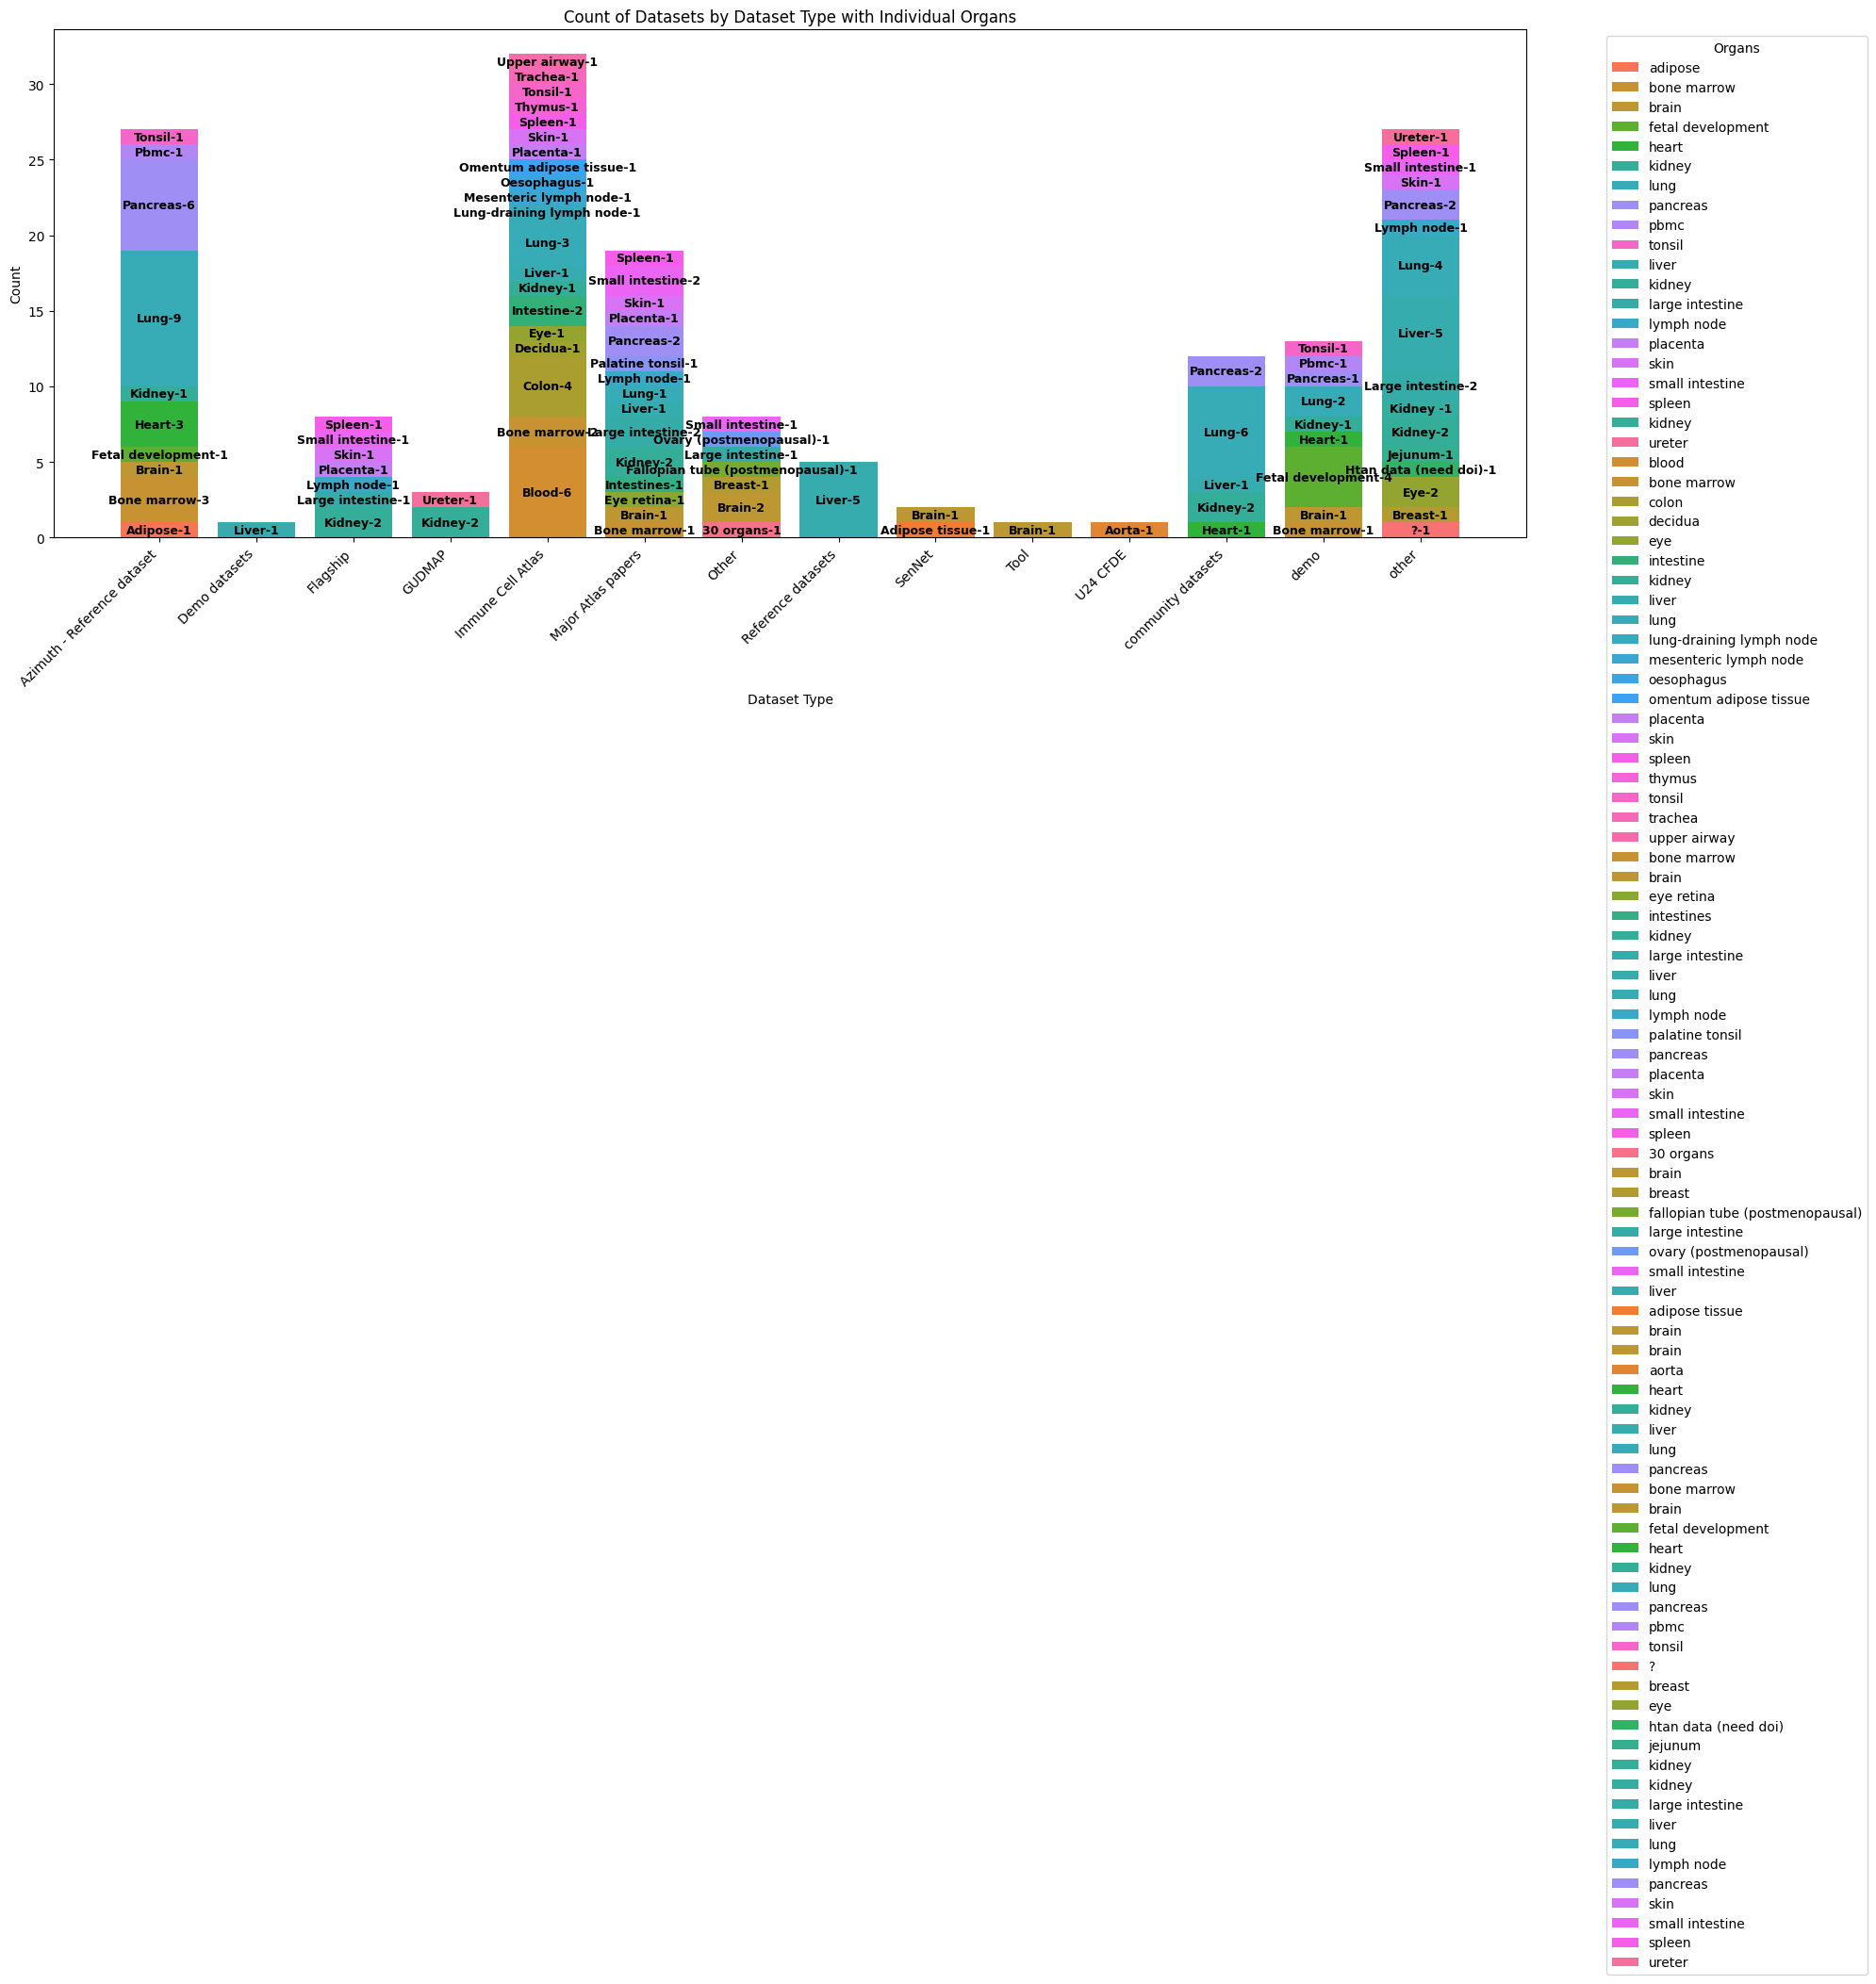

In [ ]:
# Since the execution state has been reset, we need to re-import the libraries and redefine the variables.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset from the Excel file, considering the header starts from the 4th row
file_path = 'RUI Registration Dashboard.xlsx'
sheet_name = 'All studies for RUI-registratio'
data_with_correct_headers = pd.read_excel(file_path, sheet_name=sheet_name, header=3)

# Preprocess the "Organ" column to treat combined organ names as separate entities
# Normalize the case to treat 'Liver' and 'liver' as the same organ
data_expanded_organs = (
    data_with_correct_headers
    .assign(Organ=lambda df: df['Organ'].str.lower().str.split(', '))
    .explode('Organ')
    .dropna(subset=['Organ'])  # Drop rows where Organ is NaN after splitting
)

# Calculate counts for each organ within each dataset type, considering case normalization
organ_counts = (
    data_expanded_organs
    .groupby(['Dataset Type', 'Organ'])
    .size()
    .reset_index(name='counts')
)

# Sort organs for consistent color mapping and create a color palette
organs_sorted = organ_counts['Organ'].sort_values().unique()
palette = sns.color_palette("husl", len(organs_sorted))
organ_color_map = {organ: color for organ, color in zip(organs_sorted, palette)}

# Initialize the matplotlib figure
plt.figure(figsize=(20, 15))

# Plot each organ's count as a separate bar segment
for dataset_type in organ_counts['Dataset Type'].unique():
    subset = organ_counts[organ_counts['Dataset Type'] == dataset_type]
    bottom = 0
    for _, row in subset.iterrows():
        plt.bar(dataset_type, row['counts'], bottom=bottom, label=row['Organ'],
                color=organ_color_map[row['Organ']])
        bottom += row['counts']

# Add a legend and informative axis label
plt.xlabel('Dataset Type')
plt.ylabel('Count')
plt.title('Count of Datasets by Dataset Type with Individual Organs')

# Annotations
for dataset_type in organ_counts['Dataset Type'].unique():
    subset = organ_counts[organ_counts['Dataset Type'] == dataset_type]
    bottom = 0
    for _, row in subset.iterrows():
        plt.text(dataset_type, bottom + (row['counts'] / 2), f"{row['Organ'].capitalize()}-{row['counts']}",
                 ha='center', va='center', color='black', fontsize=9, weight='bold')
        bottom += row['counts']

plt.xticks(rotation=45, ha='right')
plt.legend(title='Organs', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()  # Adjust layout to fit everything
plt.show()



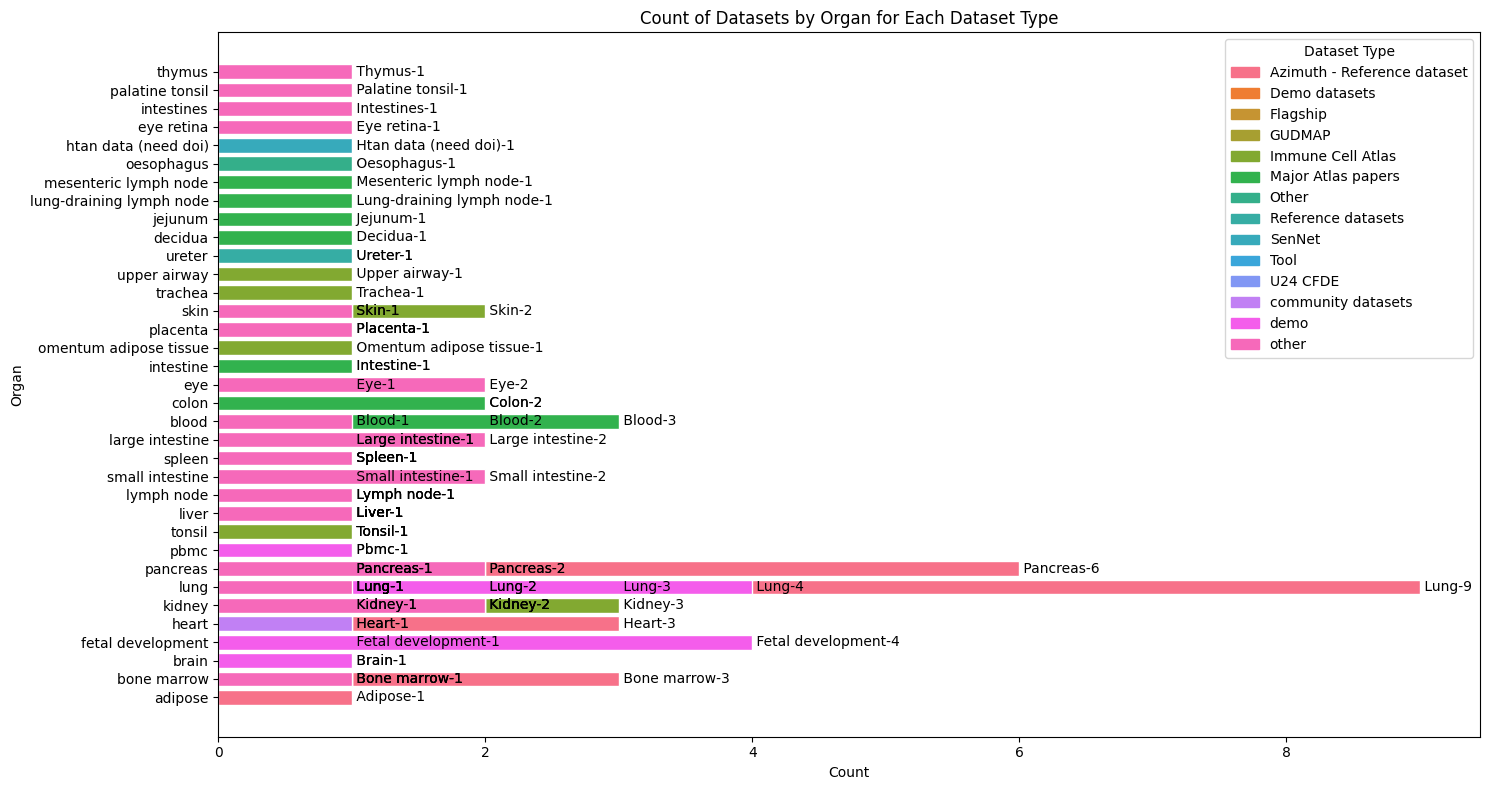

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset from the Excel file
file_path = 'RUI Registration Dashboard.xlsx'
sheet_name = 'All studies for RUI-registratio'
data = pd.read_excel(file_path, sheet_name=sheet_name, header=3)

# Normalize the 'Organ' column by converting all names to lowercase,
# then treat each name separated by a comma as an individual organ.
data['Organ'] = data['Organ'].str.lower().str.split(', ').explode('Organ').str.strip()

# Group by 'Dataset Type' and 'Organ' and calculate the counts
organ_counts = data.groupby(['Dataset Type', 'Organ']).size().reset_index(name='counts')

# Filter out '30 organs' if it exists
organ_counts = organ_counts[organ_counts['Organ'] != '30 organs']

# Sort dataset types for consistent color mapping
dataset_types_sorted = organ_counts['Dataset Type'].sort_values().unique()

# Create a color palette for the dataset types
palette = sns.color_palette("husl", n_colors=len(dataset_types_sorted))
dataset_type_color_map = dict(zip(dataset_types_sorted, palette))

# Initialize the matplotlib figure
plt.figure(figsize=(15, 8))

# Plot the counts for each organ within each dataset type
for dataset_type in dataset_types_sorted:
    subset = organ_counts[organ_counts['Dataset Type'] == dataset_type]
    plt.barh(subset['Organ'], subset['counts'], color=dataset_type_color_map[dataset_type], edgecolor='white')

# Annotate the count of each organ within each dataset type bar
for index, row in organ_counts.iterrows():
    plt.text(row['counts'], row['Organ'], f" {row['Organ'].capitalize()}-{int(row['counts'])}", va='center')

# Create a legend for dataset types
legend_patches = [plt.Rectangle((0,0),1,1, color=dataset_type_color_map[dataset_type]) for dataset_type in dataset_types_sorted]
plt.legend(legend_patches, dataset_types_sorted, title='Dataset Type')

# Set the labels and title
plt.xlabel('Count')
plt.ylabel('Organ')
plt.title('Count of Datasets by Organ for Each Dataset Type')
plt.tight_layout()
plt.show()


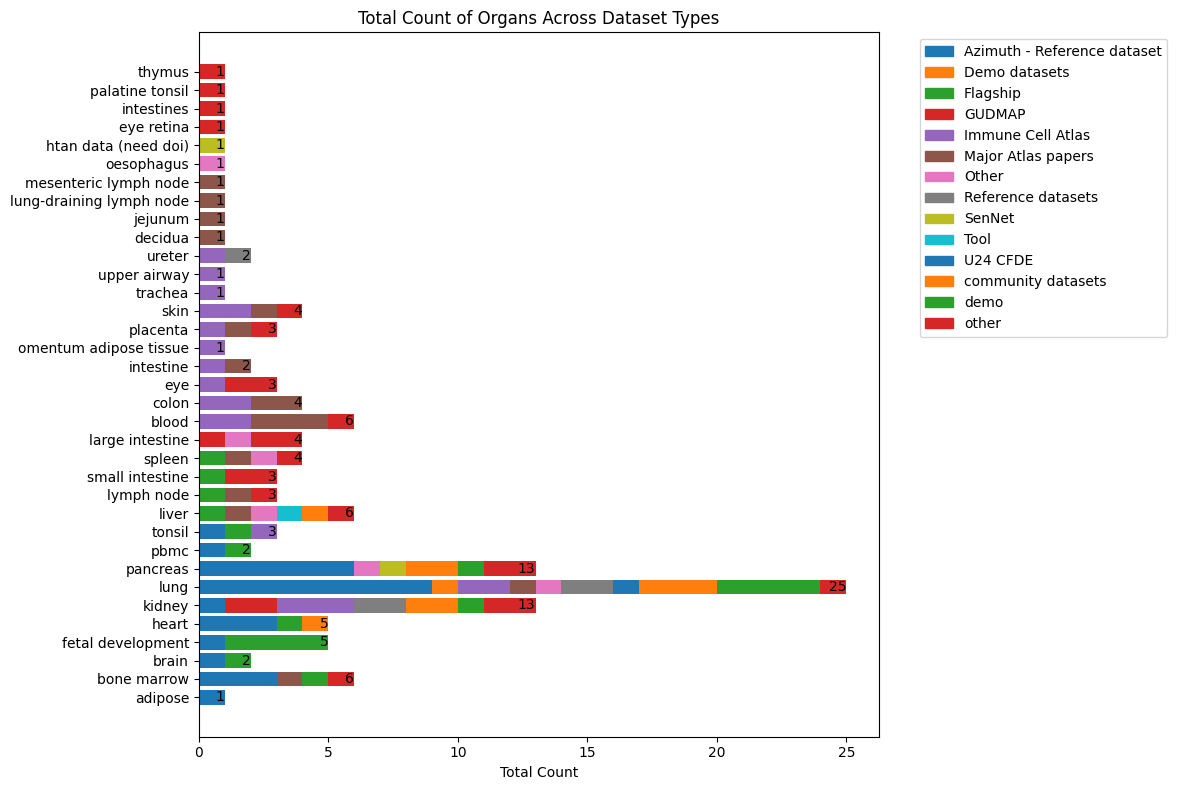

In [ ]:
# Assuming the correct preprocessing and dataset loading has been done earlier

# We will now aggregate the counts correctly
data_grouped = data.groupby(['Dataset Type', 'Organ'], as_index=False).size()

# Get unique dataset types and assign colors
unique_dataset_types = data_grouped['Dataset Type'].unique()
colors = sns.color_palette('tab10', len(unique_dataset_types))
color_dict = dict(zip(unique_dataset_types, colors))

# Now we create the bar chart
plt.figure(figsize=(12, 8))
bars = {}

# Plot each organ count within each dataset type
for i, (dataset_type, organ, count) in data_grouped.iterrows():
    color = color_dict[dataset_type]
    if organ in bars:
        bottom = bars[organ]
    else:
        bottom = 0
    bars[organ] = bottom + count
    plt.barh(organ, count, left=bottom, color=color)

# Annotate the count of each organ at the end of each dataset type's bar segment
for organ, value in bars.items():
    plt.text(value, organ, str(value), va='center', ha='right')

# Create custom legend
import matplotlib.patches as mpatches
legend_patches = [mpatches.Patch(color=color, label=dataset_type) for dataset_type, color in color_dict.items()]
plt.legend(handles=legend_patches, bbox_to_anchor=(1.05, 1), loc='upper left')

# Set the labels and title
plt.xlabel('Total Count')
plt.title('Total Count of Organs Across Dataset Types')
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

# Load the dataset
file_path = 'as-datasets-modality.csv'
df = pd.read_csv(file_path)

# Display the first few rows to understand its structure
print(df.head())


      sex                                        organId      organ_label  \
0  Female  http://purl.obolibrary.org/obo/UBERON_0000059  large intestine   
1  Female  http://purl.obolibrary.org/obo/UBERON_0000059  large intestine   
2  Female  http://purl.obolibrary.org/obo/UBERON_0000059  large intestine   
3  Female  http://purl.obolibrary.org/obo/UBERON_0000059  large intestine   
4  Female  http://purl.obolibrary.org/obo/UBERON_0000059  large intestine   

                                      refOrgan  \
0  http://purl.org/ccf/latest/ccf.owl#VHFColon   
1  http://purl.org/ccf/latest/ccf.owl#VHFColon   
2  http://purl.org/ccf/latest/ccf.owl#VHFColon   
3  http://purl.org/ccf/latest/ccf.owl#VHFColon   
4  http://purl.org/ccf/latest/ccf.owl#VHFColon   

                                      refOrganAs  \
0  http://purl.obolibrary.org/obo/UBERON_0001159   
1  http://purl.obolibrary.org/obo/UBERON_0001159   
2  http://purl.obolibrary.org/obo/UBERON_0001159   
3  http://purl.obolibrary.or

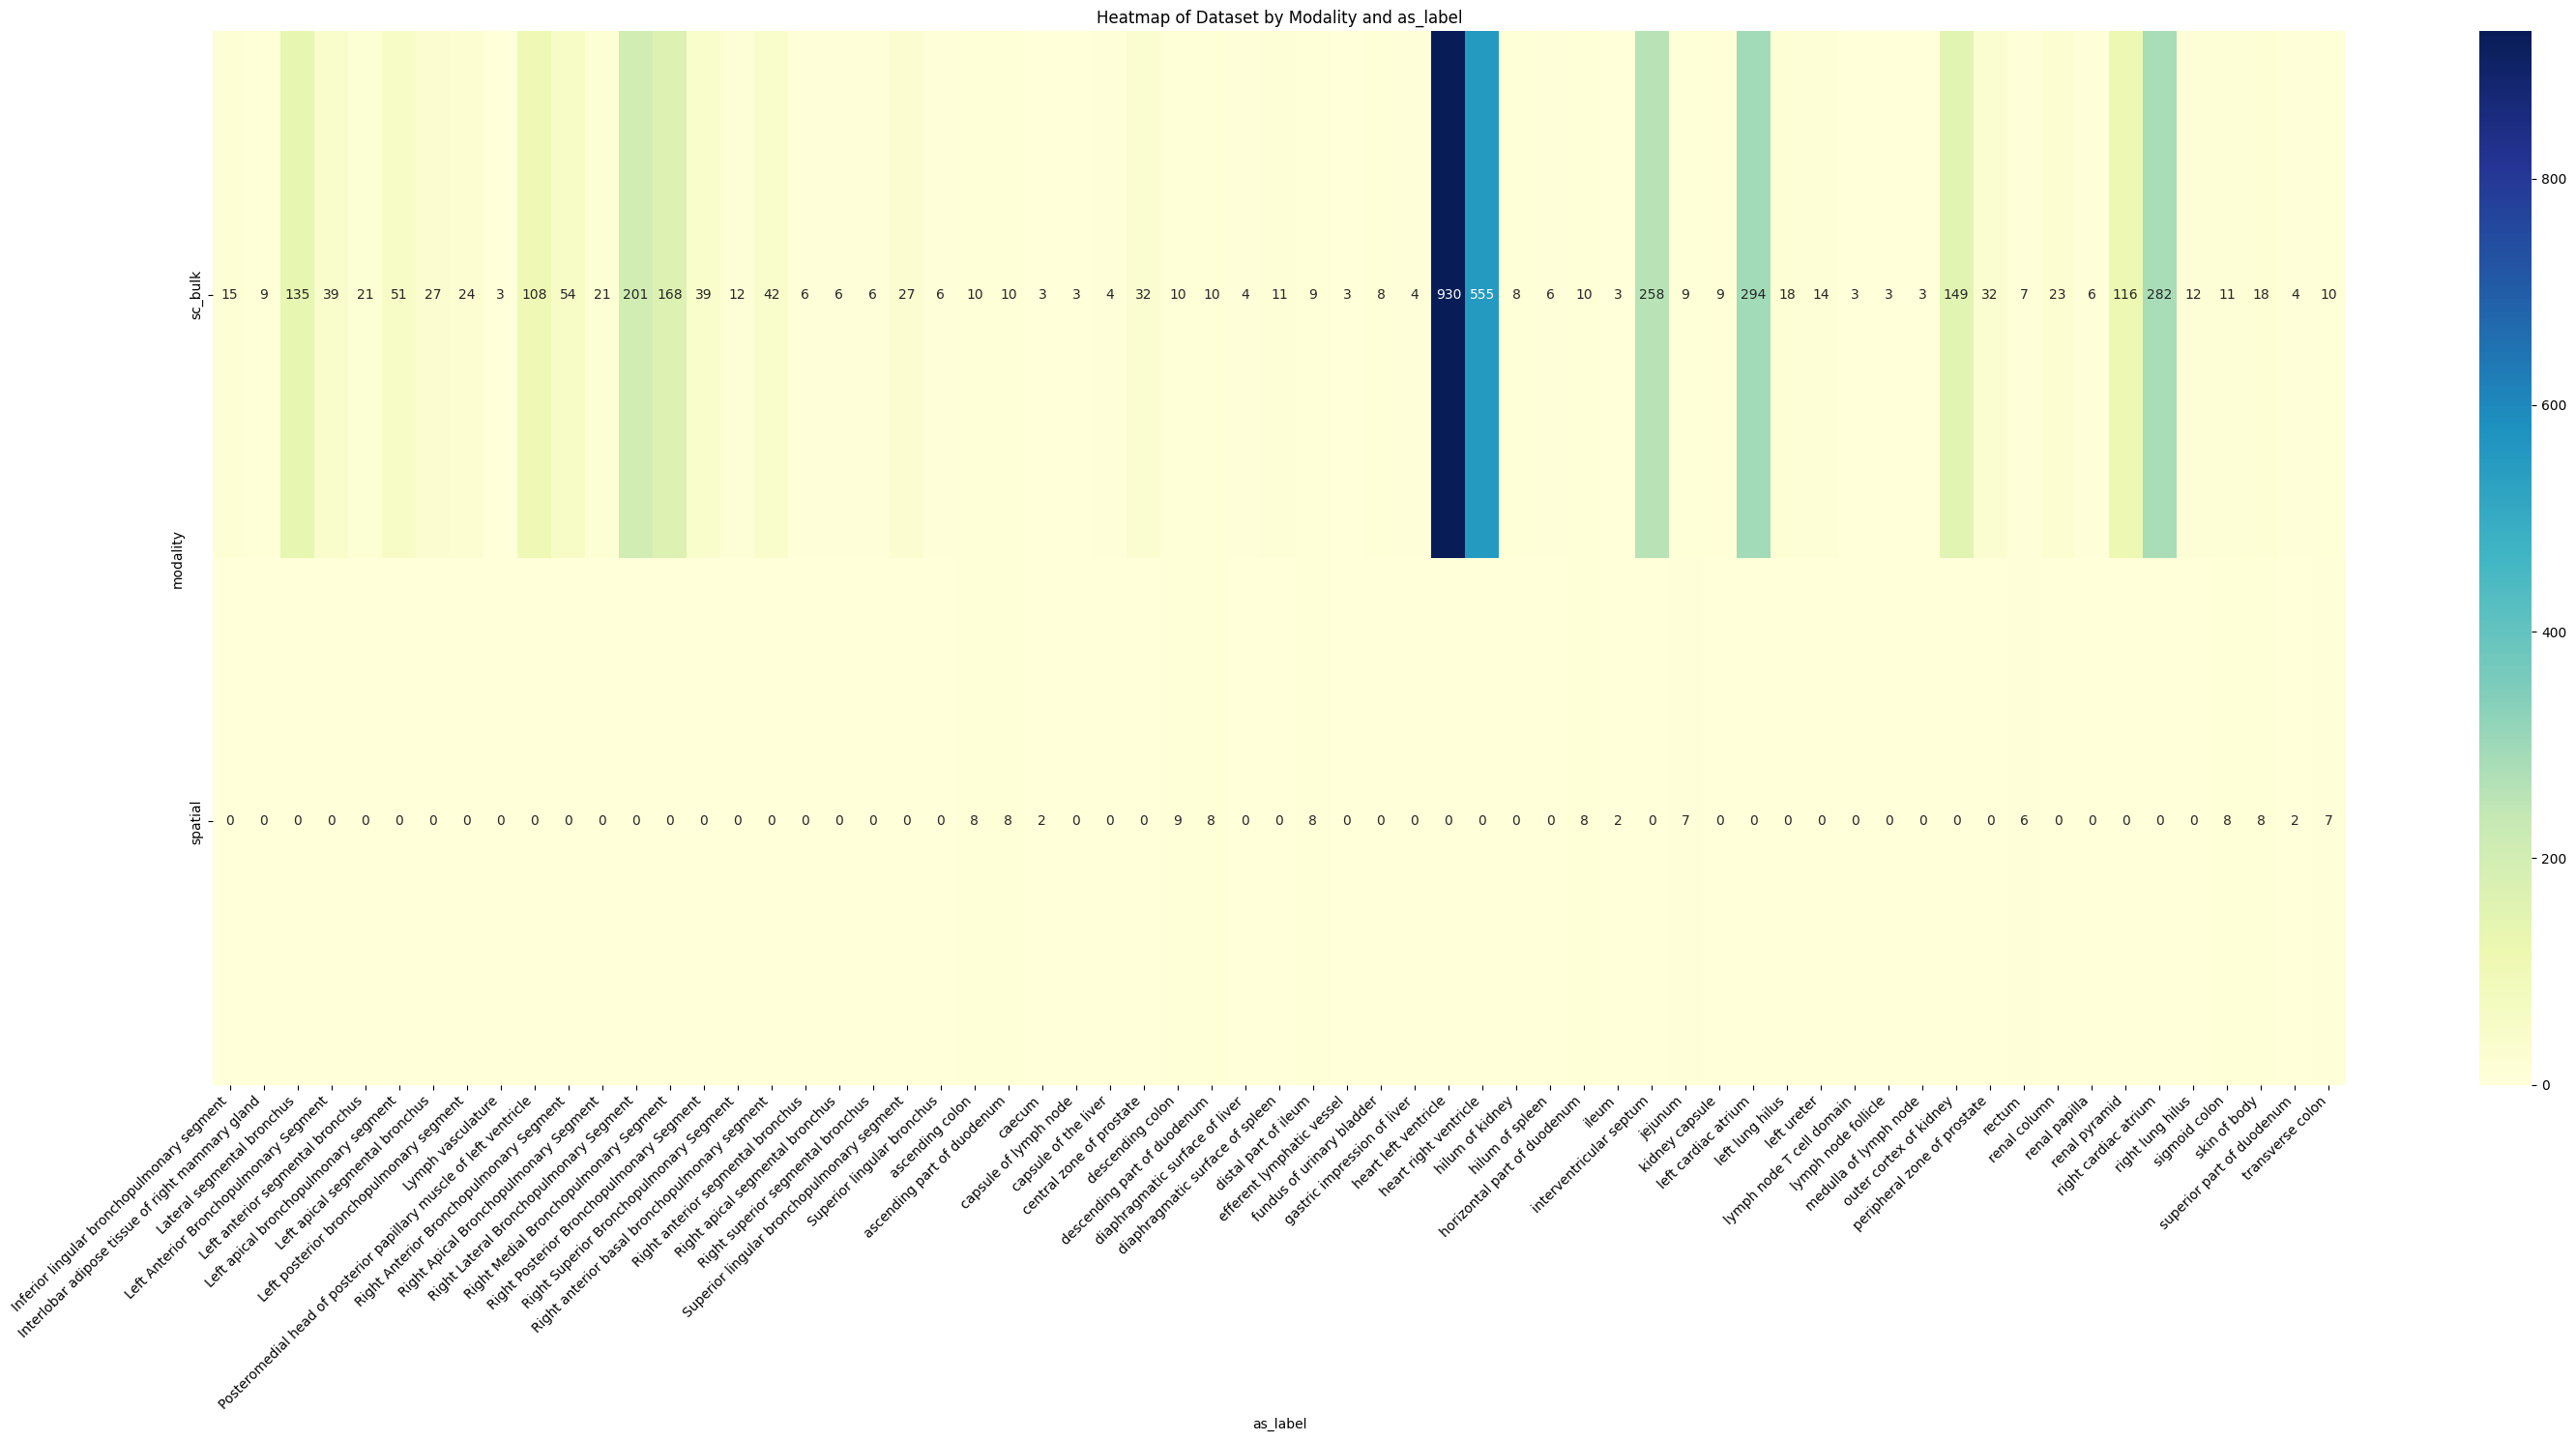

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Creating a pivot table
pivot_table = pd.pivot_table(df, values='dataset', index='modality', columns='as_label', aggfunc='count', fill_value=0)

# Generating the heatmap
plt.figure(figsize=(30, 15))
sns.heatmap(pivot_table, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Heatmap of Dataset by Modality and as_label')
plt.xlabel('as_label')
plt.ylabel('modality')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


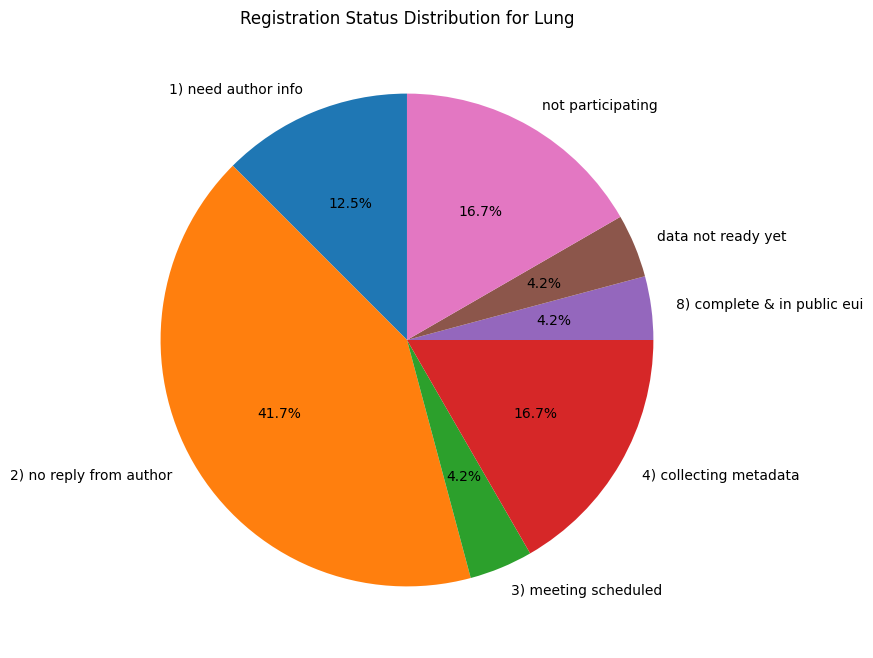

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset from the Excel file
file_path = 'RUI Registration Dashboard.xlsx'
sheet_name = 'All studies for RUI-registratio'
data = pd.read_excel(file_path, sheet_name=sheet_name, header=3)

# Normalize organ names to lowercase and explode combined names
data['Organ'] = data['Organ'].str.lower().str.split(', ').explode('Organ').str.strip()

# Normalize 'Registration Status'
data['Registration Status'] = data['Registration Status'].str.lower()

# Drop NaN values in 'Organ' and 'Registration Status' columns
data = data.dropna(subset=['Organ', 'Registration Status'])

# Aggregate data
aggregated_data = data.groupby(['Organ', 'Registration Status']).size().reset_index(name='Count')

# Since we're focusing on non-overlapping annotations, let's create a summary pie chart for a selected organ
# This is a simplification to avoid generating too many pie charts at once

# Example: Aggregate data for a specific organ, e.g., 'heart'
specific_organ = 'lung'
organ_data = aggregated_data[aggregated_data['Organ'] == specific_organ]

# Check if there's data to plot
if not organ_data.empty:
    # Plot
    plt.figure(figsize=(8, 8))
    plt.pie(organ_data['Count'], labels=organ_data['Registration Status'], autopct='%1.1f%%', startangle=90)
    plt.title(f'Registration Status Distribution for {specific_organ.capitalize()}')
    plt.show()
else:
    print(f"No data available for organ: {specific_organ}")


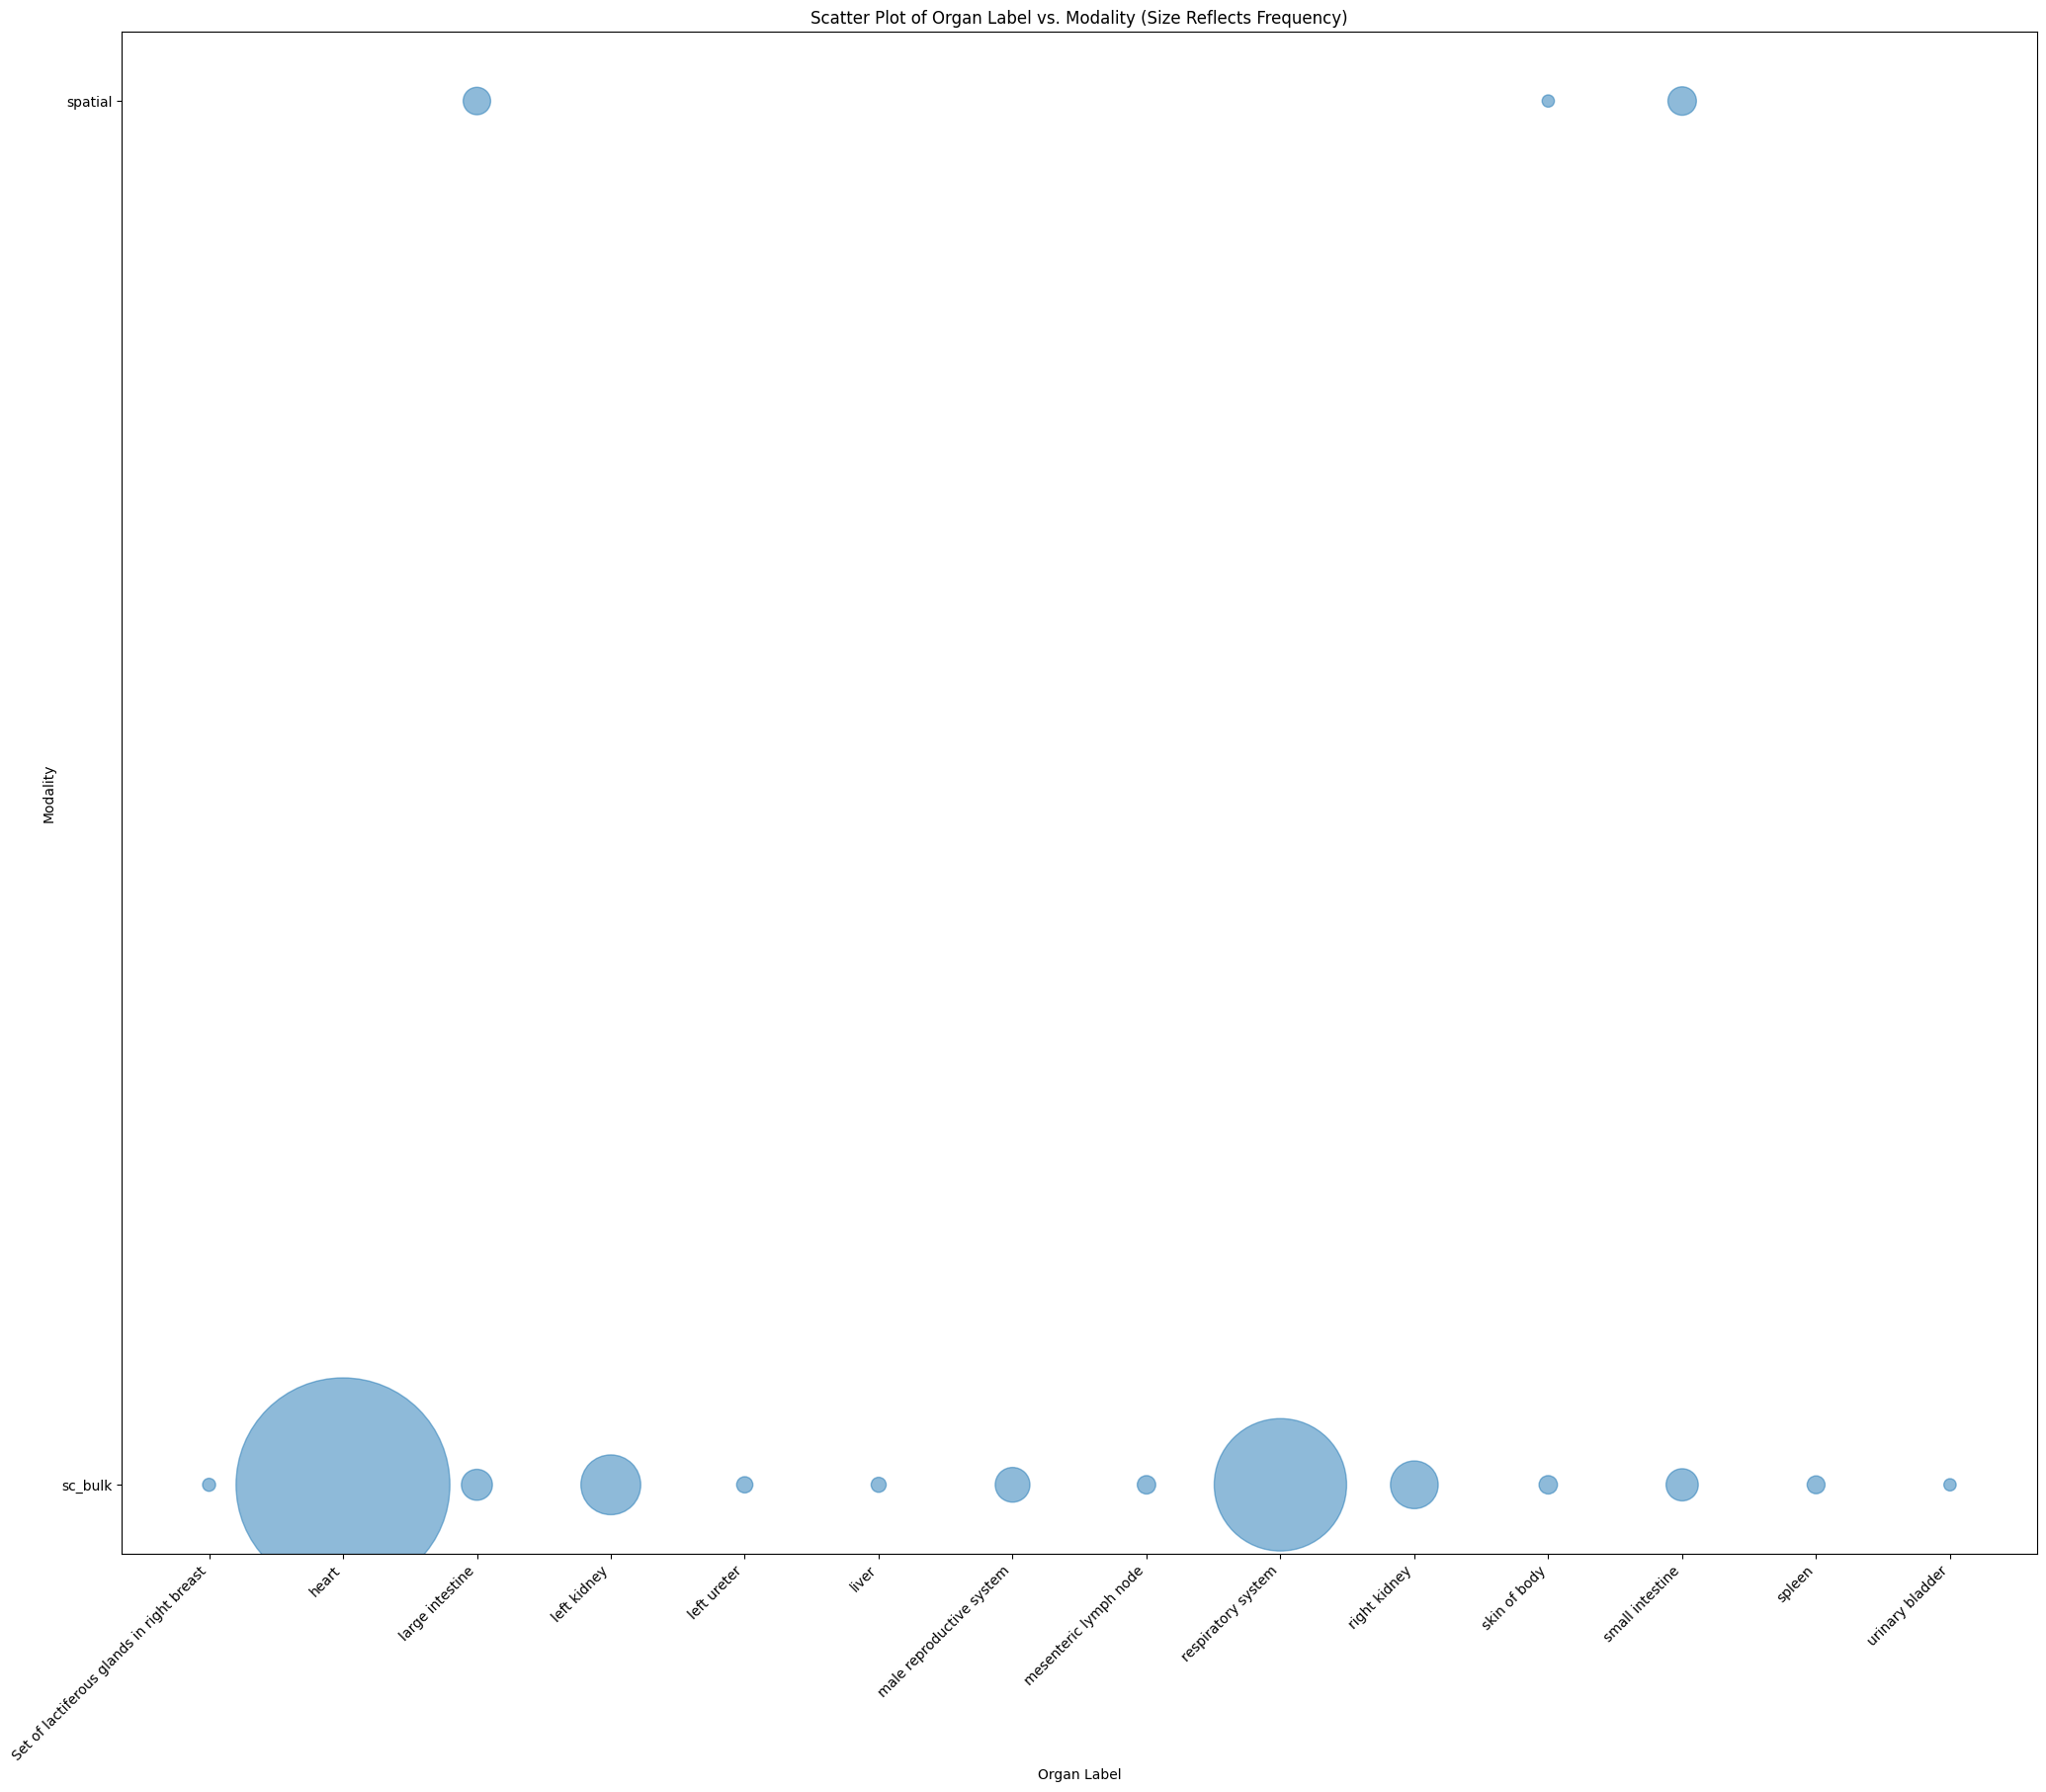

In [ ]:
# Aggregating the data to count occurrences
aggregated_data = df.groupby(['organ_label', 'modality']).size().reset_index(name='counts')

# Mapping `organ_label` and `modality` to numerical values for plotting
aggregated_data['organ_label_id'] = pd.Categorical(aggregated_data['organ_label']).codes
aggregated_data['modality_id'] = pd.Categorical(aggregated_data['modality']).codes

# Plotting
plt.figure(figsize=(25, 20))
scatter = plt.scatter(aggregated_data['organ_label_id'], aggregated_data['modality_id'], s=aggregated_data['counts']*10, alpha=0.5)

# Adding labels and title
plt.title('Scatter Plot of Organ Label vs. Modality (Size Reflects Frequency)')
plt.xlabel('Organ Label')
plt.ylabel('Modality')
plt.xticks(ticks=np.unique(aggregated_data['organ_label_id']), labels=aggregated_data['organ_label'].unique(), rotation=45, ha="right")
plt.yticks(ticks=np.unique(aggregated_data['modality_id']), labels=aggregated_data['modality'].unique())

plt.show()


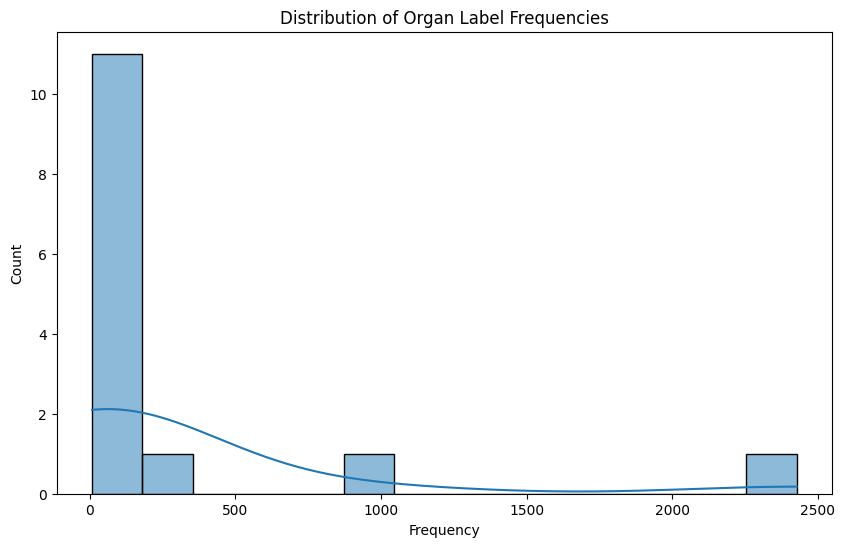

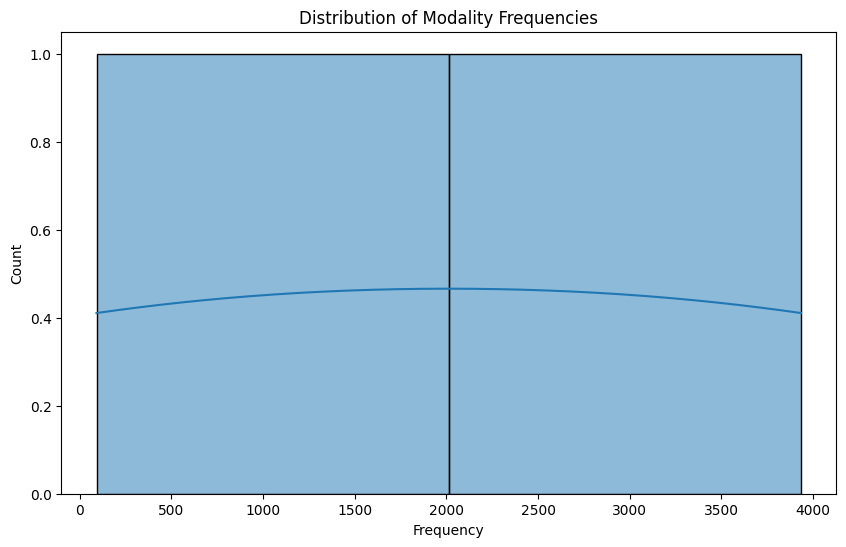

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Aggregating the data
organ_label_counts = df['organ_label'].value_counts()
modality_counts = df['modality'].value_counts()

# Distribution plot for `organ_label` frequencies
plt.figure(figsize=(10, 6))
sns.histplot(organ_label_counts, bins=len(organ_label_counts), kde=True)
plt.title('Distribution of Organ Label Frequencies')
plt.xlabel('Frequency')
plt.ylabel('Count')
plt.show()

# Distribution plot for `modality` frequencies
plt.figure(figsize=(10, 6))
sns.histplot(modality_counts, bins=len(modality_counts), kde=True)
plt.title('Distribution of Modality Frequencies')
plt.xlabel('Frequency')
plt.ylabel('Count')
plt.show()


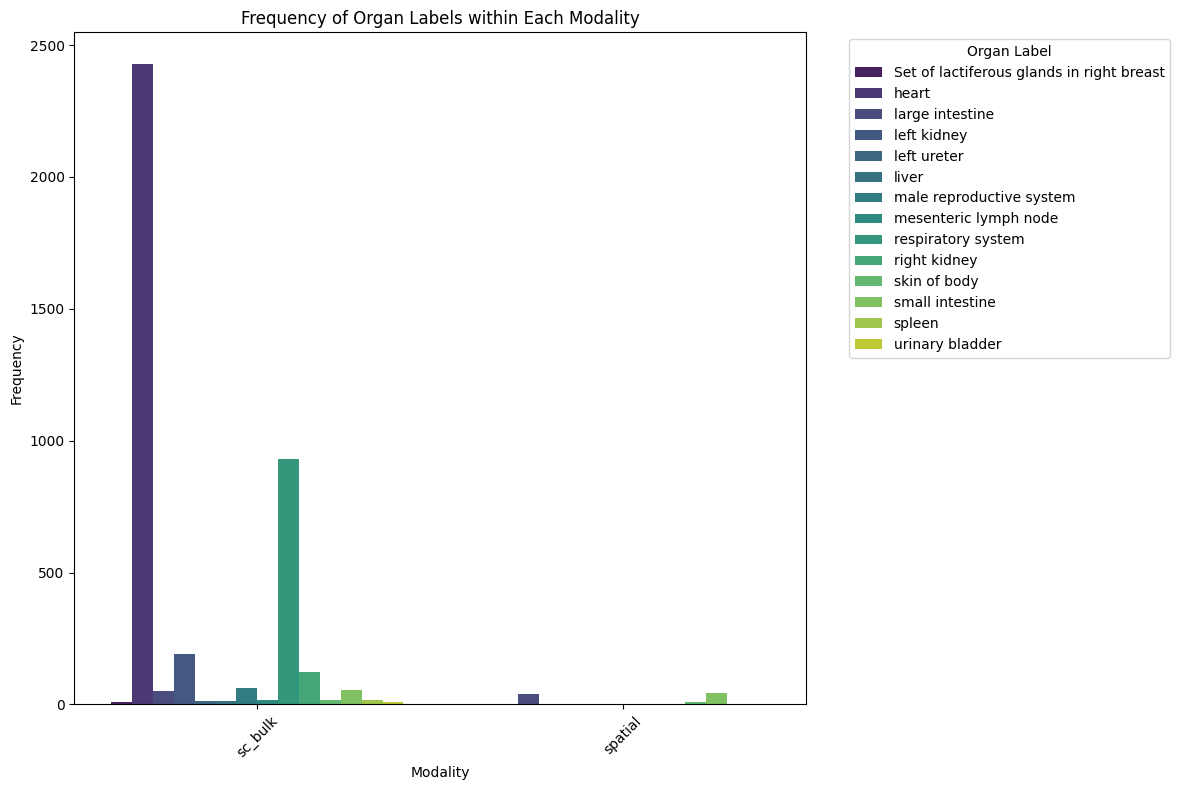

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Aggregating the data
grouped_data = df.groupby(['modality', 'organ_label']).size().reset_index(name='count')

# Creating a bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x='modality', y='count', hue='organ_label', data=grouped_data, palette='viridis')
plt.title('Frequency of Organ Labels within Each Modality')
plt.xlabel('Modality')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.legend(title='Organ Label', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


<ipython-input-24-e8ba22099e7f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sex', data=df, palette='coolwarm')


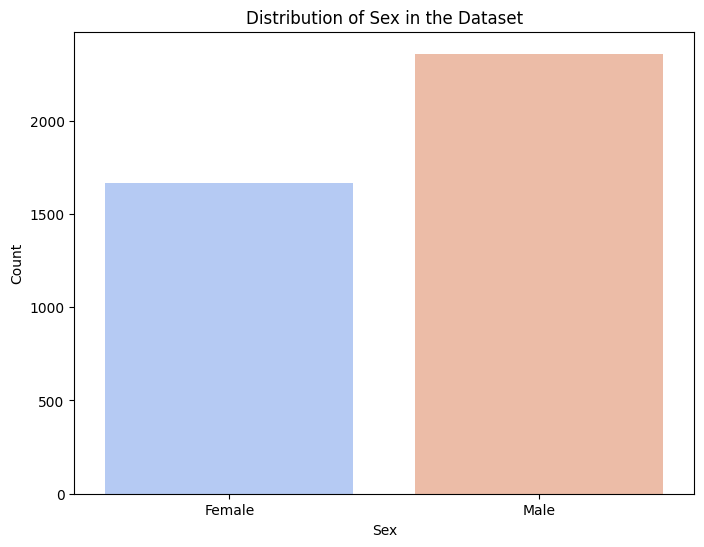

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='sex', data=df, palette='coolwarm')
plt.title('Distribution of Sex in the Dataset')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()


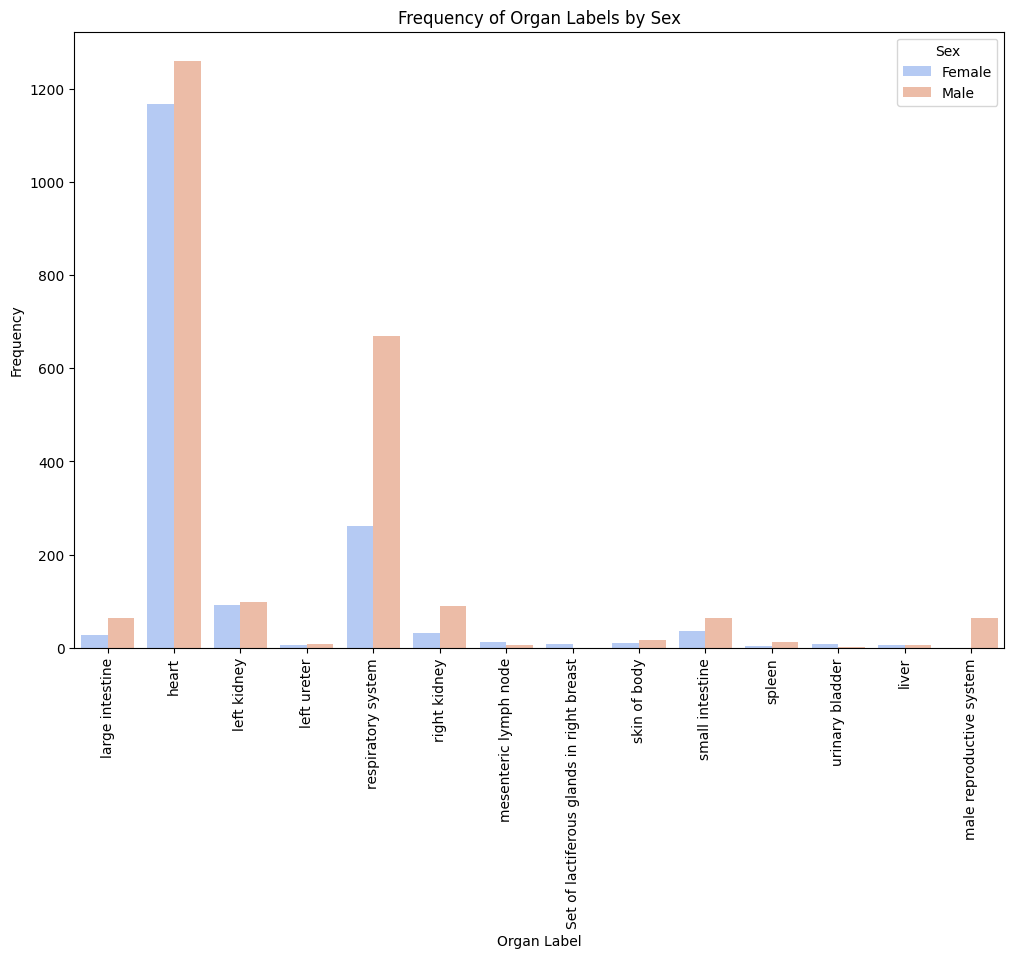

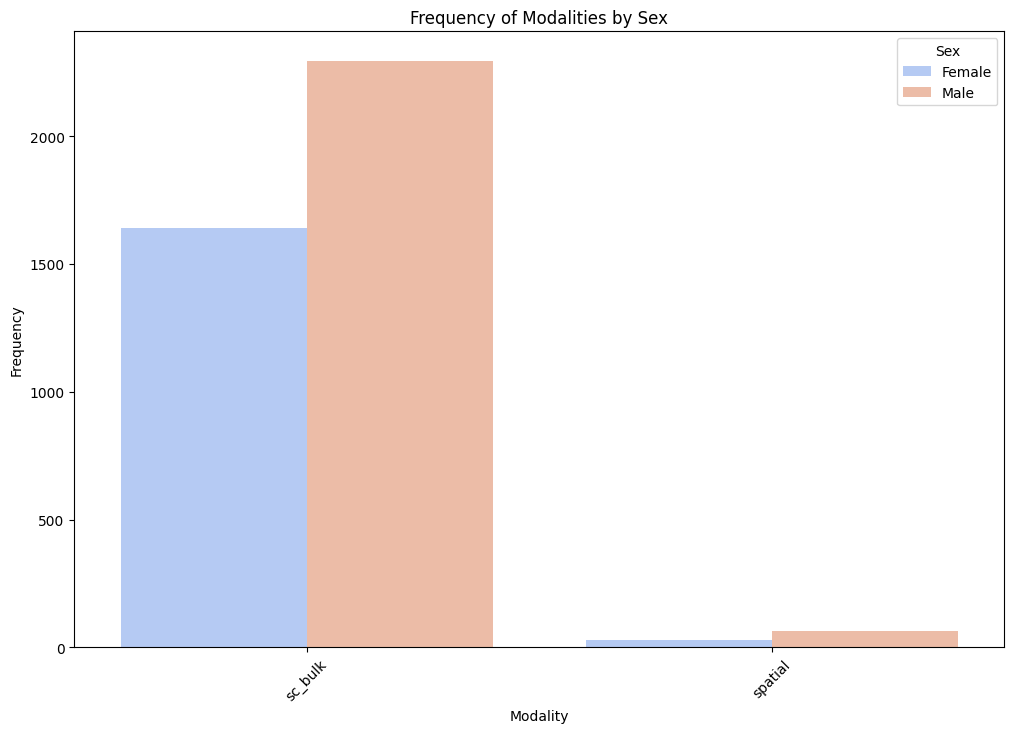

In [ ]:
# Frequency of organ_label by sex
plt.figure(figsize=(12, 8))
sns.countplot(x='organ_label', hue='sex', data=df, palette='coolwarm')
plt.title('Frequency of Organ Labels by Sex')
plt.xlabel('Organ Label')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.legend(title='Sex')
plt.show()

# Frequency of modality by sex
plt.figure(figsize=(12, 8))
sns.countplot(x='modality', hue='sex', data=df, palette='coolwarm')
plt.title('Frequency of Modalities by Sex')
plt.xlabel('Modality')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.legend(title='Sex')
plt.show()


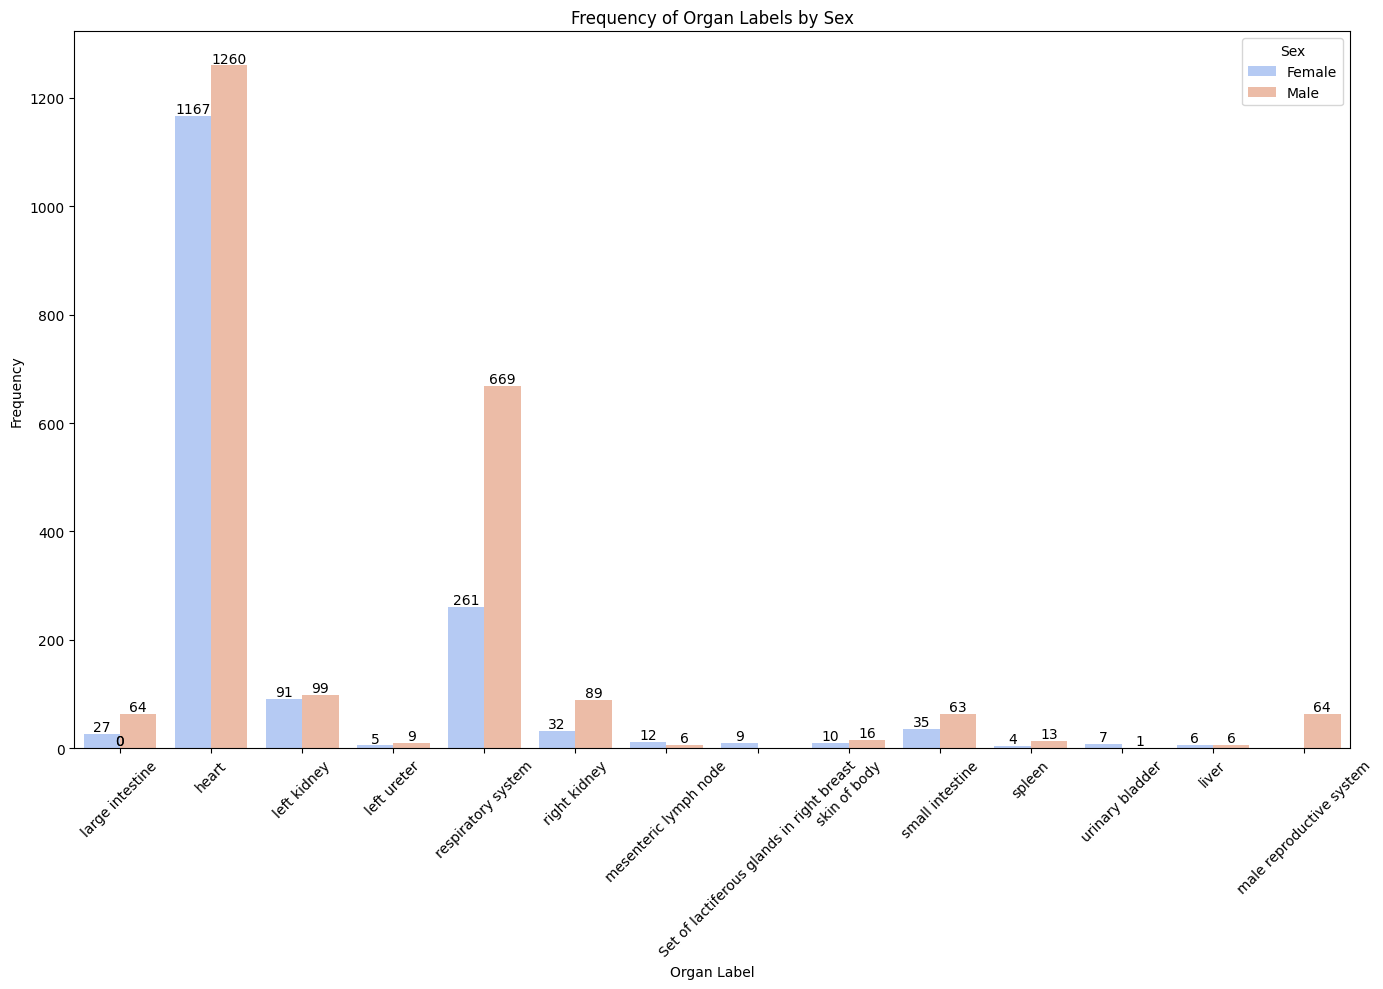

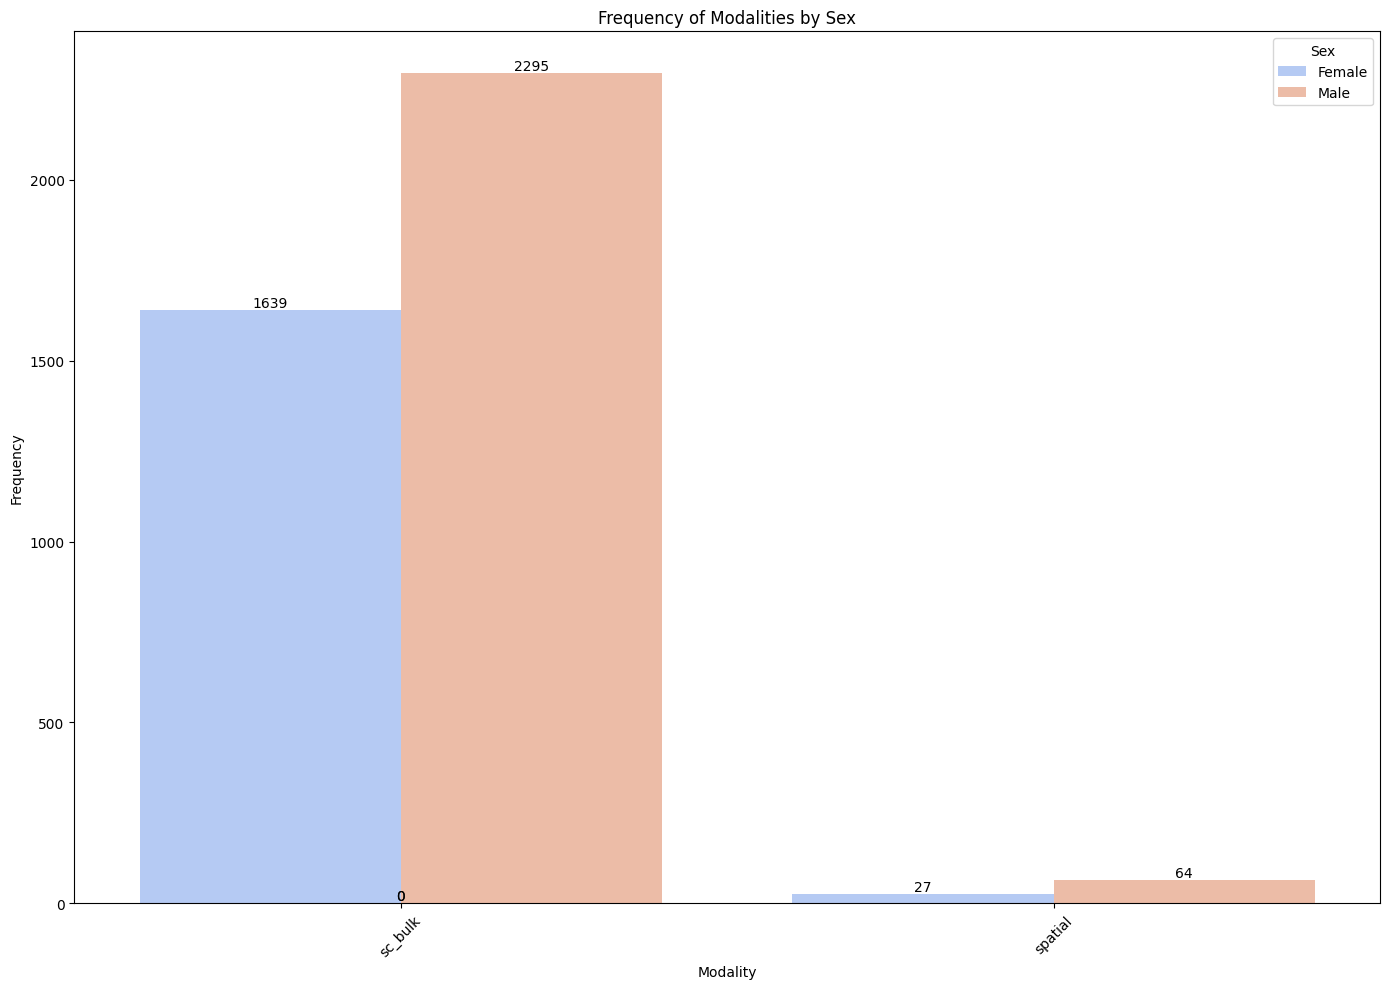

In [ ]:
# Adjusted function to add counts above bars, checking for NaN values
def add_counts(ax):
    for p in ax.patches:
        height = p.get_height()
        if not np.isnan(height):  # Check if height is not NaN
            ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height),
                        ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                        textcoords='offset points')

# Re-plotting with adjusted function
plt.figure(figsize=(14, 10))
ax1 = sns.countplot(x='organ_label', hue='sex', data=df, palette='coolwarm')
add_counts(ax1)
plt.title('Frequency of Organ Labels by Sex')
plt.xlabel('Organ Label')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.legend(title='Sex')
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 10))
ax2 = sns.countplot(x='modality', hue='sex', data=df, palette='coolwarm')
add_counts(ax2)
plt.title('Frequency of Modalities by Sex')
plt.xlabel('Modality')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.legend(title='Sex')
plt.tight_layout()
plt.show()
